# Table of Contents
1. Introduction
    1. About The Project
    2. Objectives
2. Imports & Settings
3. Reading In The Data & Basic EDA
4. The Restaurant DataFrame
    1. Splitting Off The Data
    2. Identifying The Top 10 US States
    3. Visualizing The Top 10 States DataFrame
5. Creating Restaurant Subsets For Each State
    1. All Restaurants In Each State
    2. Top 3 Restaurants In Each State
    3. Visualizing The Top 3 Restaurants By State
6. Creating Review Subsets For Each State
    1. Reviews For The Top 3 Restaurants By State
    2. Visualizing Reviews For The Top 3 Restaurants By State
7. Conclusions

# 1. Introduction
## A. About The Project
This notebook is an exercise in exploratory data analysis and data visualization using the Yelp dataset.
## B. Objectives
The objectives of this project are to identify:
- What is the distribution of ratings for restaurants across the top 10 US states?
- What is the distribution of review counts for restaurants across the top 10 states?
- What are the top 3 most popular restaurants in each state?
- Where are the top 3 restaurants for each state located on a map?
- What are the general thoughts for the top 3 restaurants by state?
- What are the sentiments on the reviews for the top 3 restaurants by state?

# 2. Imports & Settings

In [1]:
## Imports
# Standard Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Project-Specific Imports
import folium
from wordcloud import WordCloud, STOPWORDS

In [2]:
## Visualization Settings
# Seaborn
sns.set_theme(
    context = "notebook", 
    style = "whitegrid", 
    palette = "Set3", 
    rc = {
    "figure.figsize": (12, 8), 
    "axes.spines.top": False, 
    "axes.spines.right": False
    }
)
# Word Clouds
stopwords = set(STOPWORDS)
stopwords.update(["place", "food", "day", "night", "meal", "meals", "go", "gone", "everything", "order", "drinks", "drink", "will", "time", "always", "one", "got", "make", "made", "eat", "came", "come"])

# 3. Reading In The Data & Basic EDA

In [3]:
## Reading In Data
# Yelp Business Data
df_business = pd.read_json("../data/yelp_academic_dataset_business.json", lines = True)

# Yelp Review Data
df_review = pd.read_json("../data/yelp_academic_dataset_review.json", lines = True)

In [8]:
## Basic EDA - Business
# Summary Statistics
df_business.describe()

latitude      longitude          stars   review_count  \
count  150346.000000  150346.000000  150346.000000  150346.000000   
mean       36.671150     -89.357339       3.596724      44.866561   
std         5.872759      14.918502       0.974421     121.120136   
min        27.555127    -120.095137       1.000000       5.000000   
25%        32.187293     -90.357810       3.000000       8.000000   
50%        38.777413     -86.121179       3.500000      15.000000   
75%        39.954036     -75.421542       4.500000      37.000000   
max        53.679197     -73.200457       5.000000    7568.000000   

            is_open  
count  150346.00000  
mean        0.79615  
std         0.40286  
min         0.00000  
25%         1.00000  
50%         1.00000  
75%         1.00000  
max         1.00000

In [9]:
## Basic EDA - Business
# Column Names
df_business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [10]:
## Basic EDA - Business
# Data Types
df_business.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object

In [11]:
## Basic EDA - Business
# Null Values Check
df_business.isnull().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

In [12]:
## Basic EDA - Review
# Summary Statistics
df_review.describe()

stars        useful         funny          cool
count  6.990280e+06  6.990280e+06  6.990280e+06  6.990280e+06
mean   3.748584e+00  1.184609e+00  3.265596e-01  4.986175e-01
std    1.478705e+00  3.253767e+00  1.688729e+00  2.172460e+00
min    1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00
25%    3.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
50%    4.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
75%    5.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
max    5.000000e+00  1.182000e+03  7.920000e+02  4.040000e+02

In [13]:
## Basic EDA - Review
# Coolumn Names
df_review.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [14]:
## Basic EDA - Review
# Coolumn Names
df_review.dtypes

review_id              object
user_id                object
business_id            object
stars                   int64
useful                  int64
funny                   int64
cool                    int64
text                   object
date           datetime64[ns]
dtype: object

In [15]:
## Basic EDA - Review
# Null Vallues Check
df_review.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

# 4. The Restaurant DataFrame

## A. Splitting Off The Data
To make operations simpler, businesses that have "Restaurant" as one their categories are being copied into a new dataframe. Furthermore, a subset of restaurants only in the top 10 states is spliced out.

In [6]:
## Restaurant Data
# Creating A Subset Of Only Restaurants
df_restaurants = df_business.loc[df_business.categories.str.contains("Restaurants", na = False)]
df_restaurants = df_restaurants.reset_index(drop = True)

In [22]:
## Restaurant Data
# Creating A Subset Of Only Restaurants In The Top 10 States
subset_restaurants_top_ten = df_restaurants.loc[df_restaurants.state.isin(["AZ", "FL", "ID", "IN", "LA", "MO", "NJ", "NV", "PA", "TN"])]
subset_restaurants_top_ten = subset_restaurants_top_ten.reset_index(drop = True)

## B. Identifying The Top 10 US States

In [17]:
## Basic EDA - Restaurants
# Identifying State Restaurant Counts
df_restaurants["state"].value_counts()

PA     12641
FL      8731
TN      4352
MO      4247
IN      4150
LA      3640
NJ      3341
AZ      2671
AB      2410
NV      1673
ID      1302
CA      1161
IL       983
DE       961
NC         1
CO         1
HI         1
MT         1
XMS        1
Name: state, dtype: int64

In [18]:
## Creating A Subset
# Storing the Top 10 US States & Their Counts
top_ten_states = pd.DataFrame(df_restaurants["state"].value_counts().head(11).reset_index())
top_ten_states = top_ten_states.rename(columns = {"index": "state", "state": "count"})
top_ten_states = top_ten_states.loc[top_ten_states["state"] != "AB"] # This is Alabama, Canada
top_ten_states = top_ten_states.reset_index(drop = True)
top_ten_states

state  count
0    PA  12641
1    FL   8731
2    TN   4352
3    MO   4247
4    IN   4150
5    LA   3640
6    NJ   3341
7    AZ   2671
8    NV   1673
9    ID   1302

## C. Visualizing The Top 10 States DataFrame

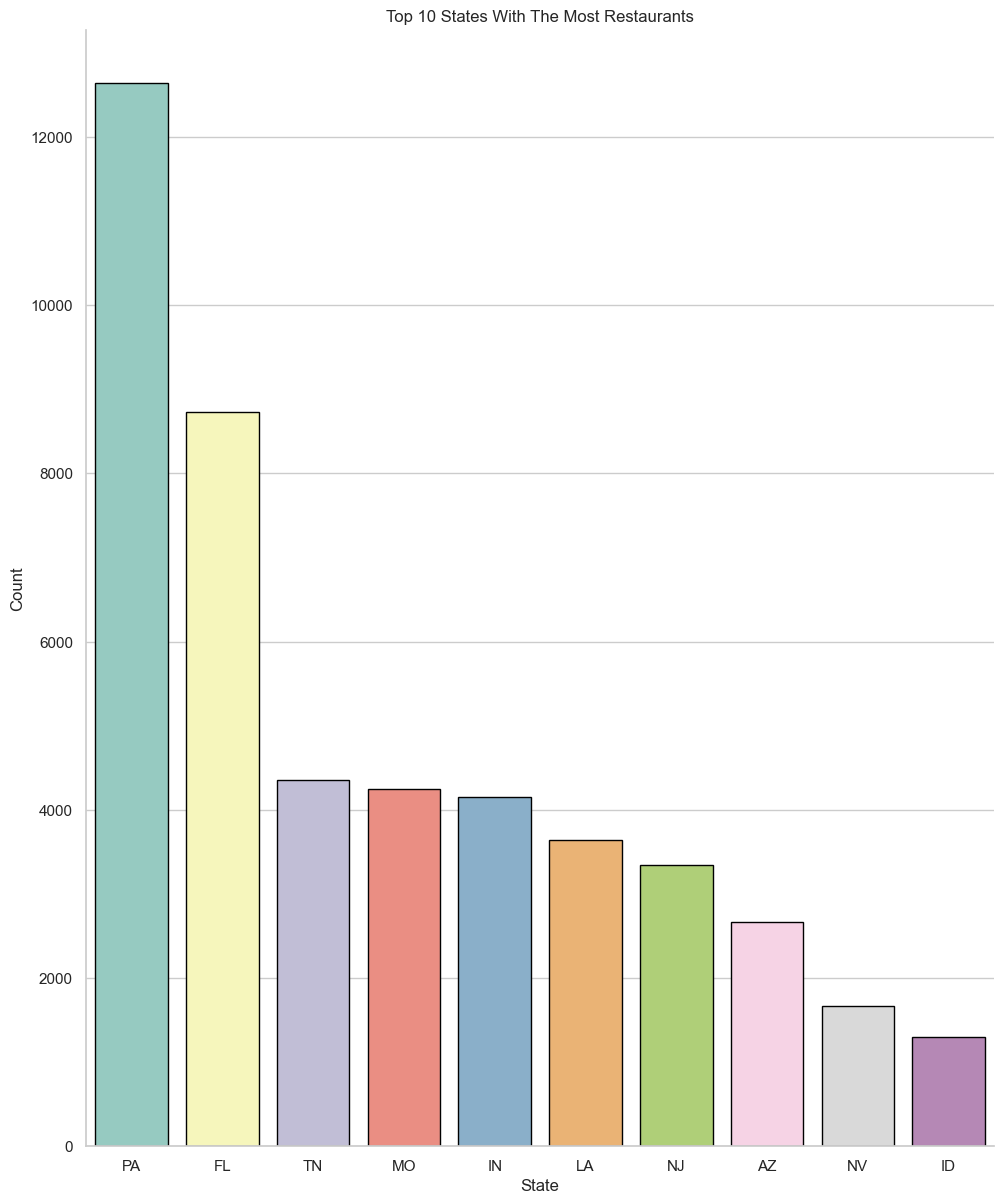

In [21]:
# Visualizing the Restaurant Count For The Top 10 States
plot_restaurant_count = sns.catplot(
    data = top_ten_states,
    x = "state",
    y = "count",
    kind = "bar",
    height = 12, 
    aspect = .85,
    edgecolor = "0"
)
plot_restaurant_count.set(
    title = "Top 10 States With The Most Restaurants",
    xlabel = "State",
    ylabel = "Count"
)
plt.show()

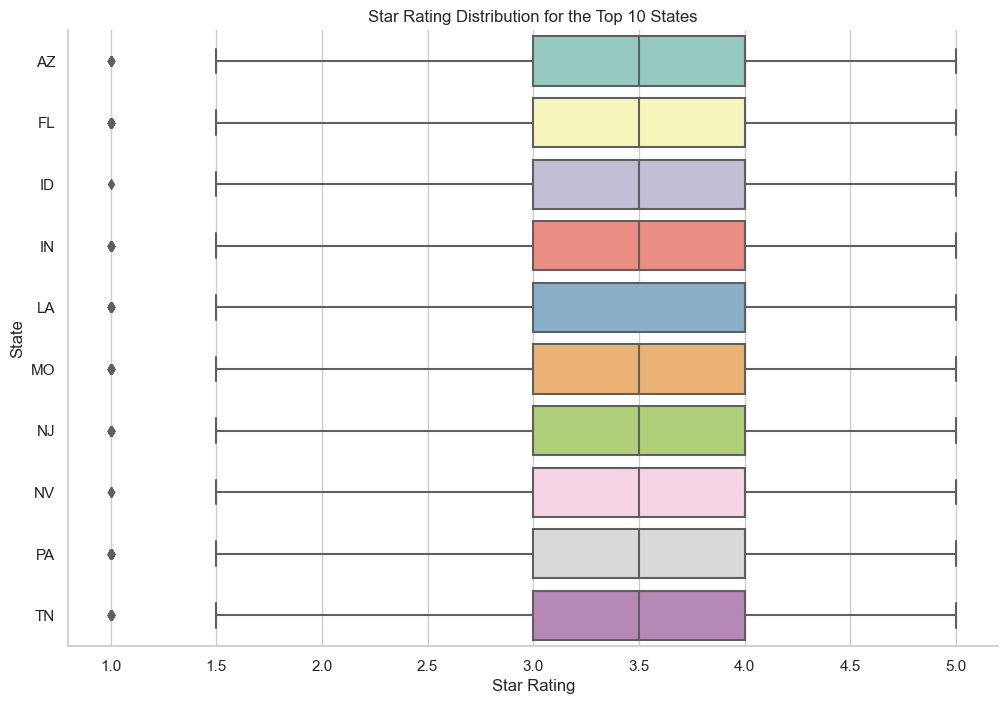

In [23]:
# Visualing Stars for the Top 10
plot_restaurant_star_rating_distribution = sns.boxplot(
    data = subset_restaurants_top_ten,
    x = "stars",
    y = "state",
    order = ["AZ", "FL", "ID", "IN", "LA", "MO", "NJ", "NV", "PA", "TN"],
    orient = "h",
    #palette = "ch:.25"
)
plot_restaurant_star_rating_distribution.set(
    title = "Star Rating Distribution for the Top 10 States",
    xlabel = "Star Rating",
    ylabel = "State"
)
plt.show()

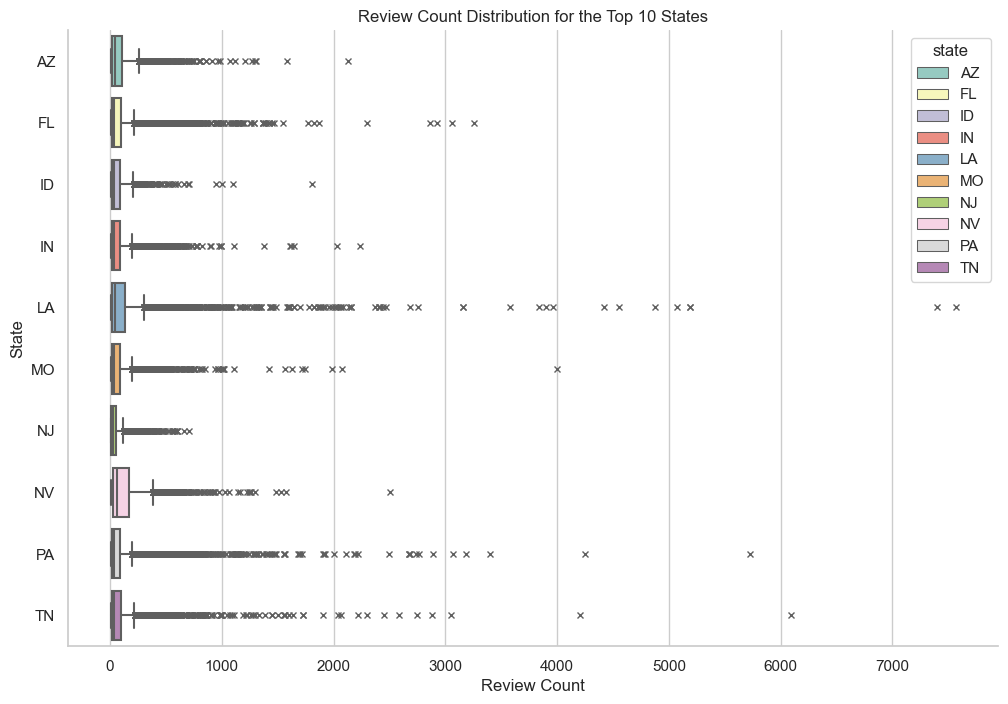

In [24]:
# Visualizing Restaurant Review Counts for the Top 10 States
plot_resturant_review_count_distribution = sns.boxplot(
    data = subset_restaurants_top_ten,
    x = "review_count",
    y = "state",
    order = ["AZ", "FL", "ID", "IN", "LA", "MO", "NJ", "NV", "PA", "TN"],
    hue = "state",
    hue_order = ["AZ", "FL", "ID", "IN", "LA", "MO", "NJ", "NV", "PA", "TN"],
    dodge = False,
    orient = "h",
    flierprops = {"marker": "x"}
)
plot_resturant_review_count_distribution.set(
    title = "Review Count Distribution for the Top 10 States",
    xlabel = "Review Count",
    ylabel = "State"
)
plt.show()

# 5. Creating Restaurant Subsets For Each State

## A. All Restaurants In Each State

In [25]:
## Getting Data Subsets
# Restaurants In Arizona (AZ)
subset_restaurants_az = subset_restaurants_top_ten.loc[subset_restaurants_top_ten.state == "AZ"]
subset_restaurants_az = subset_restaurants_az.reset_index(drop = True)
# Restaurants In Florida (FL)
subset_restaurants_fl = subset_restaurants_top_ten.loc[subset_restaurants_top_ten.state == "FL"]
subset_restaurants_fl = subset_restaurants_fl.reset_index(drop = True)
# Restaurants In Idaho (ID)
subset_restaurants_id = subset_restaurants_top_ten.loc[subset_restaurants_top_ten.state == "ID"]
subset_restaurants_id = subset_restaurants_id.reset_index(drop = True)
# Restaurants In Indiana (IN)
subset_restaurants_in = subset_restaurants_top_ten.loc[subset_restaurants_top_ten.state == "IN"]
subset_restaurants_in = subset_restaurants_in.reset_index(drop = True)
# Restaurants In Louisiana (LA)
subset_restaurants_la = subset_restaurants_top_ten.loc[subset_restaurants_top_ten.state == "LA"]
subset_restaurants_la = subset_restaurants_la.reset_index(drop = True)
# Restaurants In Missouri (MO)
subset_restaurants_mo = subset_restaurants_top_ten.loc[subset_restaurants_top_ten.state == "MO"]
subset_restaurants_mo = subset_restaurants_mo.reset_index(drop = True)
# Restaurants In New Jersey (NJ)
subset_restaurants_nj = subset_restaurants_top_ten.loc[subset_restaurants_top_ten.state == "NJ"]
subset_restaurants_nj = subset_restaurants_nj.reset_index(drop = True)
# Restaurants In Nevada (NV)
subset_restaurants_nv = subset_restaurants_top_ten.loc[subset_restaurants_top_ten.state == "NV"]
subset_restaurants_nv = subset_restaurants_nv.reset_index(drop = True)
# Restaurants In Pennsylvania (PA)
subset_restaurants_pa = subset_restaurants_top_ten.loc[subset_restaurants_top_ten.state == "PA"]
subset_restaurants_pa = subset_restaurants_pa.reset_index(drop = True)
# Restaurants In Tennessee (TN)
subset_restaurants_tn = subset_restaurants_top_ten.loc[subset_restaurants_top_ten.state == "TN"]
subset_restaurants_tn = subset_restaurants_tn.reset_index(drop = True)

## B. Top 3 Restaurants In Each State

In [37]:
## Storing Top 3 Restaurants (5 Star Rating & Highest Review Count) - AZ
subset_restaurants_az_top_three = subset_restaurants_az.sort_values(by = ["stars", "review_count"], ascending = False).head(3)
subset_restaurants_az_top_three = subset_restaurants_az_top_three.reset_index(drop = True)
subset_restaurants_az_top_three

business_id                name              address    city  \
0  DVBJRvnCpkqaYl6nHroaMg            Tumerico        2526 E 6th St  Tucson   
1  6OwxdpajDSJi3DkMqkr2sw  Barista Del Barrio    1002 N Grande Ave  Tucson   
2  jh8j-DWqgWkbRe_a2XtKFQ        Barrio Bread  18 S Eastbourne Ave  Tucson   

  state postal_code   latitude   longitude  stars  review_count  is_open  \
0    AZ       85716  32.227705 -110.934722    5.0           705        1   
1    AZ       85745  32.234870 -110.989976    5.0           357        1   
2    AZ       85716  32.220885 -110.927943    5.0           221        1   

                                          attributes  \
0  {'RestaurantsGoodForGroups': 'True', 'Business...   
1  {'HappyHour': 'False', 'HasTV': 'False', 'Rest...   
2  {'RestaurantsTakeOut': 'True', 'RestaurantsGoo...   

                                          categories  \
0  Mexican, Gluten-Free, Vegetarian, Restaurants,...   
1  Restaurants, Food, Breakfast & Brunch, Coffee ...   
2        Food, Specialty Food, Bakeries, Restaurants   

                                               hours  
0  {'Tuesday': '9:0-15:0', 'Wednesday': '9:0-20:0...  
1                              {'Monday': '0:0-0:0'}  
2  {'Monday': '0:0-0:0', 'Tuesday': '9:0-14:0', '...

In [36]:
## Storing Top 3 Restaurants (5 Star Rating & Highest Review Count) - FL
subset_restaurants_fl_top_three = subset_restaurants_fl.sort_values(by = ["stars", "review_count"], ascending = False).head(3)
subset_restaurants_fl_top_three = subset_restaurants_fl_top_three.reset_index(drop = True)
subset_restaurants_fl_top_three

business_id                                name  \
0  FHDuu5Mv1bEkusxEuhptZQ  Barracuda Deli Cafe St. Pete Beach   
1  D9p7-HsY9llYP3BaCVg4DA                         Cafe Soleil   
2  yOoTTOsIBk10XCszYVnrDQ                          AJ's Press   

                 address            city state postal_code   latitude  \
0         6640 Gulf Blvd   St Pete Beach    FL       33706  27.736694   
1         4695 Gulf Blvd  St. Pete Beach    FL       33706  27.723416   
2  3224 W Tampa Bay Blvd           Tampa    FL       33614  27.973812   

   longitude  stars  review_count  is_open  \
0 -82.748189    5.0           521        1   
1 -82.739291    5.0           468        1   
2 -82.496982    5.0           376        0   

                                          attributes  \
0  {'RestaurantsAttire': 'u'casual'', 'Restaurant...   
1  {'BikeParking': 'True', 'RestaurantsAttire': '...   
2  {'RestaurantsTakeOut': 'True', 'NoiseLevel': '...   

                                          categories  \
0  Caribbean, Latin American, Restaurants, Breakf...   
1  Restaurants, French, Coffee & Tea, Bakeries, B...   
2  American (New), Cafes, Restaurants, Breakfast ...   

                                               hours  
0  {'Tuesday': '11:0-20:30', 'Wednesday': '11:0-2...  
1  {'Monday': '8:0-15:0', 'Tuesday': '8:0-15:0', ...  
2                                               None

In [35]:
## Storing Top 3 Restaurants (5 Star Rating & Highest Review Count) - ID
subset_restaurants_id_top_three = subset_restaurants_id.sort_values(by = ["stars", "review_count"], ascending = False).head(3)
subset_restaurants_id_top_three = subset_restaurants_id_top_three.reset_index(drop = True)
subset_restaurants_id_top_three

business_id           name                       address   city  \
0  oGvauLs2oFbLIBUjv5F77Q  Han's Chimaek           1716 S Broadway Ave  Boise   
1  G77XgkojEyK19X7LHiqklA      Koco Bell  13601 W McMillan Rd, Ste 104  Boise   
2  VUKhLVz4X4zVS5wwjAxQjg         ā café                 109 S 10th St  Boise   

  state postal_code   latitude   longitude  stars  review_count  is_open  \
0    ID       83706  43.591711 -116.193377    5.0            80        1   
1    ID       83713  43.647893 -116.352071    5.0            55        1   
2    ID       83702  43.616756 -116.206361    5.0            48        1   

                                          attributes  \
0  {'BusinessParking': '{'garage': False, 'street...   
1  {'OutdoorSeating': 'True', 'Ambience': '{u'div...   
2  {'Alcohol': 'u'beer_and_wine'', 'BusinessParki...   

                                          categories  \
0  Korean, Chicken Wings, Nightlife, Bars, Beer B...   
1  Sandwiches, Sushi Bars, Restaurants, Korean, A...   
2             Restaurants, Cafes, Food, Coffee & Tea   

                                               hours  
0  {'Monday': '0:0-0:0', 'Tuesday': '16:0-22:0', ...  
1  {'Monday': '11:30-19:30', 'Tuesday': '11:30-19...  
2  {'Monday': '0:0-0:0', 'Tuesday': '8:0-15:0', '...

In [34]:
## Storing Top 3 Restaurants (5 Star Rating & Highest Review Count) - IN
subset_restaurants_in_top_three = subset_restaurants_in.sort_values(by = ["stars", "review_count"], ascending = False).head(3)
subset_restaurants_in_top_three = subset_restaurants_in_top_three.reset_index(drop = True)
subset_restaurants_in_top_three

business_id                           name              address  \
0  SK8mugK0lNcb0okR5pQ8pQ  St Yared Ethiopian Restaurant  11210 Fall Creek Rd   
1  emrUsUZvqCkytUu4i3kjLw    Sundae's Ice Cream & Coffee       9922 E 79th St   
2  0I9XZD7JTqY9iTF8nXRnXw                Ali'i Poke Indy        910 W 10th St   

           city state postal_code   latitude  longitude  stars  review_count  \
0  Indianapolis    IN       46256  39.934860 -85.951146    5.0           250   
1  Indianapolis    IN       46256  39.899194 -85.992880    5.0           225   
2  Indianapolis    IN       46202  39.781112 -86.175156    5.0           223   

   is_open                                         attributes  \
0        1  {'RestaurantsTakeOut': 'True', 'Caters': 'True...   
1        1  {'OutdoorSeating': 'True', 'BusinessAcceptsCre...   
2        1  {'RestaurantsDelivery': 'True', 'RestaurantsTa...   

                                          categories  \
0  Ethiopian, Food, Restaurants, Coffee & Tea, Je...   
1  Caterers, Event Planning & Services, Desserts,...   
2  Seafood, Hawaiian, Poke, Food, Restaurants, Ev...   

                                               hours  
0  {'Tuesday': '11:0-20:0', 'Wednesday': '11:0-20...  
1  {'Monday': '12:0-22:0', 'Tuesday': '12:0-22:0'...  
2  {'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...

In [33]:
## Storing Top 3 Restaurants (5 Star Rating & Highest Review Count) - LA
subset_restaurants_la_top_three = subset_restaurants_la.sort_values(by = ["stars", "review_count"], ascending = False).head(3)
subset_restaurants_la_top_three = subset_restaurants_la_top_three.reset_index(drop = True)
subset_restaurants_la_top_three

business_id                     name                  address  \
0  rbPK4jSyFS10zhWYvo_Srg  Cafe Porche and snowbar          1625 Baronne St   
1  -A2OLubXDsMRPNN7LqohPA           Rollin Fatties          1430 Tulane Ave   
2  WStVCYmGWYtn1AZ_SvEDtQ                 NolaNica  16 W Airline Hwy, Ste B   

          city state postal_code   latitude  longitude  stars  review_count  \
0  New Orleans    LA       70113  29.939316 -90.078939    5.0           172   
1  New Orleans    LA       70112  29.955040 -90.076877    5.0           171   
2       Kenner    LA       70062  29.981146 -90.274533    5.0           152   

   is_open                                         attributes  \
0        1  {'BusinessParking': '{'garage': False, 'street...   
1        1  {'WiFi': ''no'', 'BusinessParking': '{'garage'...   
2        1  {'BusinessParking': '{'garage': False, 'street...   

                                          categories  \
0  Food, Shaved Ice, Cajun/Creole, Breakfast & Br...   
1  Latin American, Tex-Mex, Mexican, Restaurants,...   
2  Nicaraguan, Caribbean, Restaurants, Caterers, ...   

                                               hours  
0  {'Monday': '0:0-0:0', 'Friday': '8:30-14:30', ...  
1  {'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...  
2  {'Tuesday': '11:0-15:0', 'Wednesday': '11:0-15...

In [32]:
## Storing Top 3 Restaurants (5 Star Rating & Highest Review Count) - MO
subset_restaurants_mo_top_three = subset_restaurants_mo.sort_values(by = ["stars", "review_count"], ascending = False).head(3)
subset_restaurants_mo_top_three = subset_restaurants_mo_top_three.reset_index(drop = True)
subset_restaurants_mo_top_three.loc[0, ("city")] = "St. Louis" # Fixes City Name To Match Other Entries
subset_restaurants_mo_top_three

business_id                             name  \
0  _aKr7POnacW_VizRKBpCiA                  Blues City Deli   
1  SFN5g5eexukcaZkzoiYQYg                  Kounter Kulture   
2  U4DpkzcADkXFZzYaX9smjQ  Sultān Mediterranean Restaurant   

               address       city state postal_code   latitude  longitude  \
0      2438 McNair Ave  St. Louis    MO       63104  38.605024 -90.218110   
1       3825 Watson Rd  St. Louis    MO       63109  38.595124 -90.301432   
2  4200 Manchester Ave  St. Louis    MO       63110  38.627127 -90.254300   

   stars  review_count  is_open  \
0    5.0           991        1   
1    5.0           329        1   
2    5.0           317        1   

                                          attributes  \
0  {'BikeParking': 'True', 'RestaurantsAttire': '...   
1  {'RestaurantsReservations': 'False', 'BikePark...   
2  {'BusinessParking': '{'garage': False, 'street...   

                                          categories  \
0  Delis, Bars, Restaurants, Nightlife, Pubs, Ame...   
1  Korean, Asian Fusion, Salad, Japanese, Soup, R...   
2         Mediterranean, Restaurants, Middle Eastern   

                                               hours  
0  {'Monday': '0:0-0:0', 'Tuesday': '10:30-15:0',...  
1                              {'Monday': '0:0-0:0'}  
2  {'Tuesday': '11:30-20:0', 'Wednesday': '11:30-...

In [31]:
## Storing Top 3 Restaurants (5 Star Rating & Highest Review Count) - NJ
subset_restaurants_nj_top_three = subset_restaurants_nj.sort_values(by = ["stars", "review_count"], ascending = False).head(3)
subset_restaurants_nj_top_three = subset_restaurants_nj_top_three.reset_index(drop = True)
subset_restaurants_nj_top_three

business_id                    name                  address  \
0  3Vd57ANDvkfct_4tWMItZg         Kims Restaurant  1809 N Black Horse Pike   
1  2AIMA1qpy-O5G-YEbjI0lQ            Gyro Express             7 E State St   
2  dXBXHaPCnJK2cqNb1xKKjg  Tigas Artisan Pizzeria            643 Stokes Rd   

           city state postal_code   latitude  longitude  stars  review_count  \
0  Williamstown    NJ       08094  39.708979 -75.013133    5.0           117   
1       Trenton    NJ       08608  40.220153 -74.765503    5.0            74   
2       Medford    NJ       08055  39.871208 -74.810653    5.0            66   

   is_open                                         attributes  \
0        0  {'RestaurantsReservations': 'True', 'GoodForMe...   
1        1  {'RestaurantsAttire': ''casual'', 'Restaurants...   
2        1  {'GoodForKids': 'True', 'RestaurantsTakeOut': ...   

                              categories  \
0                    Korean, Restaurants   
1    Restaurants, Afghan, Middle Eastern   
2  Sandwiches, Restaurants, Salad, Pizza   

                                               hours  
0  {'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21...  
1  {'Monday': '10:0-20:0', 'Tuesday': '10:0-20:0'...  
2  {'Monday': '11:0-20:45', 'Wednesday': '11:0-20...

In [30]:
## Storing Top 3 Restaurants (5 Star Rating & Highest Review Count) - NV
subset_restaurants_nv_top_three = subset_restaurants_nv.sort_values(by = ["stars", "review_count"], ascending = False).head(3)
subset_restaurants_nv_top_three = subset_restaurants_nv_top_three.reset_index(drop = True)
subset_restaurants_nv_top_three

business_id                     name  \
0  8QqnRpM-QxGsjDNuu0E57A         Carlillos Cocina   
1  OR7VJQ3Nk1wCcIbPN4TCQQ  Smiling With Hope Pizza   
2  tARR9jhv5gi9TjsfSVmjmw              Kaffe Crepe   

                                    address    city state postal_code  \
0                           415 S Rock Blvd  Sparks    NV       89431   
1  6135 Lakeside Dr, Ste 101, Bartley Ranch    Reno    NV       89511   
2                1300 East Plumb Ln, Ste C4    Reno    NV       89502   

    latitude   longitude  stars  review_count  is_open  \
0  39.530096 -119.766608    5.0           799        1   
1  39.471879 -119.808947    5.0           526        1   
2  39.504208 -119.782768    5.0           454        1   

                                          attributes  \
0  {'NoiseLevel': 'u'average'', 'GoodForMeal': '{...   
1  {'BikeParking': 'True', 'Alcohol': 'u'none'', ...   
2  {'Caters': 'False', 'HasTV': 'False', 'GoodFor...   

                                          categories  \
0  Bars, Mexican, Breakfast & Brunch, Restaurants...   
1                 Italian, Restaurants, Salad, Pizza   
2  Food, Restaurants, Cafes, Creperies, Coffee & Tea   

                                               hours  
0  {'Monday': '7:0-14:0', 'Tuesday': '7:0-14:0', ...  
1  {'Monday': '0:0-0:0', 'Wednesday': '17:0-20:0'...  
2  {'Monday': '9:0-15:0', 'Tuesday': '8:0-16:0', ...

In [29]:
## Storing Top 3 Restaurants (5 Star Rating & Highest Review Count) - PA
subset_restaurants_pa_top_three = subset_restaurants_pa.sort_values(by = ["stars", "review_count"], ascending = False).head(3)
subset_restaurants_pa_top_three = subset_restaurants_pa_top_three.reset_index(drop = True)
subset_restaurants_pa_top_three

business_id                            name  \
0  TE2IEDNV0RcI6s1wTOP4fg           Tortilleria San Roman   
1  Bq69zDUTbBrfmtB9OBH9uA  Grumpy's Handcarved Sandwiches   
2  Ktg3ahIxk0JIkJwXAqu2ew                    Hikari Sushi   

                       address          city state postal_code   latitude  \
0                 951 S 9th St  Philadelphia    PA       19147  39.937636   
1                137 E High St     Pottstown    PA       19464  40.246106   
2  1040 N American St, Ste 701  Philadelphia    PA       19123  39.967402   

   longitude  stars  review_count  is_open  \
0 -75.158082    5.0           219        1   
1 -75.651393    5.0           170        1   
2 -75.141153    5.0           155        1   

                                          attributes  \
0  {'NoiseLevel': 'u'average'', 'RestaurantsPrice...   
1  {'WiFi': 'u'free'', 'Caters': 'True', 'Outdoor...   
2  {'HasTV': 'False', 'RestaurantsPriceRange2': '...   

                                          categories  \
0  Convenience Stores, Italian, Specialty Food, M...   
1        Restaurants, Breakfast & Brunch, Sandwiches   
2                  Restaurants, Sushi Bars, Japanese   

                                               hours  
0  {'Monday': '0:0-0:0', 'Tuesday': '9:0-17:0', '...  
1  {'Tuesday': '7:30-15:0', 'Wednesday': '7:30-15...  
2  {'Monday': '16:30-22:0', 'Tuesday': '16:30-22:...

In [28]:
## Storing Top 3 Restaurants (5 Star Rating & Highest Review Count) - TN
subset_restaurants_tn_top_three = subset_restaurants_tn.sort_values(by = ["stars", "review_count"], ascending = False).head(3)
subset_restaurants_tn_top_three = subset_restaurants_tn_top_three.reset_index(drop = True)
subset_restaurants_tn_top_three

business_id                 name  \
0  gP_oWJykA2RocIs_GurKWQ                 Yats   
1  xBPg6gzunjpEUT6FiRrpog        Big Al's Deli   
2  3NmMVlz6sFsBJsVaPtm12A  Tasty And Delicious   

                           address       city state postal_code   latitude  \
0         2000 Mallory Ln, Ste 615   Franklin    TN       37067  35.948778   
1                   1828 4th Ave N  Nashville    TN       37208  36.186190   
2  4813 Nolensville Pike, Ste 206A  Nashville    TN       37211  36.065332   

   longitude  stars  review_count  is_open  \
0 -86.818172    5.0           623        1   
1 -86.793879    5.0           390        1   
2 -86.717862    5.0           260        1   

                                          attributes  \
0  {'ByAppointmentOnly': 'False', 'RestaurantsAtt...   
1  {'BusinessParking': '{'garage': False, 'street...   
2  {'WheelchairAccessible': 'True', 'RestaurantsG...   

                                          categories  \
0  Cajun/Creole, Restaurants, Caterers, Comfort F...   
1                       Restaurants, Delis, Southern   
2  Burgers, American (Traditional), Restaurants, ...   

                                               hours  
0  {'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'...  
1  {'Tuesday': '7:0-14:0', 'Wednesday': '7:0-14:0...  
2  {'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...

## C. Visualizing The Top 3 Restaurants By State

In [76]:
### Visualizing the Top 3 Restaurants in Arizona
## Defining Figure Size
figure_arizona = folium.Figure(width = 750,height = 750)

## Generating the Map
map_arizona_top_three = folium.Map(
    location = [subset_restaurants_az_top_three["latitude"].mean(), subset_restaurants_az_top_three["longitude"].mean()],
    zoom_start = 10,
    min_zoom = 10, 
    tiles = "cartodbpositron"
    ).add_to(figure_arizona)

## Adding Markers For Restaurants
# Restaurant 1
folium.Marker(
    location = [subset_restaurants_az_top_three.iloc[0, 6], subset_restaurants_az_top_three.iloc[0, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_az_top_three.iloc[0, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_az_top_three.iloc[0, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_az_top_three.iloc[0, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_az_top_three.iloc[0, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_az_top_three.iloc[0, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_az_top_three.iloc[0, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_az_top_three.iloc[0, 12]}",
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_arizona_top_three)

# Restaurant 2
folium.Marker(
    location = [subset_restaurants_az_top_three.iloc[1, 6], subset_restaurants_az_top_three.iloc[1, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_az_top_three.iloc[1, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_az_top_three.iloc[1, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_az_top_three.iloc[1, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_az_top_three.iloc[1, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_az_top_three.iloc[1, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_az_top_three.iloc[1, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_az_top_three.iloc[1, 12]}", 
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_arizona_top_three)

# Restaurant 3
folium.Marker(
    location = [subset_restaurants_az_top_three.iloc[2, 6], subset_restaurants_az_top_three.iloc[2, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_az_top_three.iloc[2, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_az_top_three.iloc[2, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_az_top_three.iloc[2, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_az_top_three.iloc[2, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_az_top_three.iloc[2, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_az_top_three.iloc[2, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_az_top_three.iloc[2, 12]}",
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_arizona_top_three)

## Outputting the Map
map_arizona_top_three

In [77]:
### Visualizing the Top 3 Restaurants in Florida
## Defining Figure Size
figure_florida = folium.Figure(width = 750,height = 750)

## Generating the Map
map_florida_top_three = folium.Map(
    location = [subset_restaurants_fl_top_three["latitude"].mean(), subset_restaurants_fl_top_three["longitude"].mean()],
    zoom_start = 10,
    min_zoom = 10, 
    tiles = "cartodbpositron"
    ).add_to(figure_florida)

## Adding Markers For Restaurants
# Restaurant 1
folium.Marker(
    location = [subset_restaurants_fl_top_three.iloc[0, 6], subset_restaurants_fl_top_three.iloc[0, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_fl_top_three.iloc[0, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_fl_top_three.iloc[0, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_fl_top_three.iloc[0, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_fl_top_three.iloc[0, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_fl_top_three.iloc[0, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_fl_top_three.iloc[0, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_fl_top_three.iloc[0, 12]}",
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_florida_top_three)

# Restaurant 2
folium.Marker(
    location = [subset_restaurants_fl_top_three.iloc[1, 6], subset_restaurants_fl_top_three.iloc[1, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_fl_top_three.iloc[1, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_fl_top_three.iloc[1, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_fl_top_three.iloc[1, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_fl_top_three.iloc[1, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_fl_top_three.iloc[1, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_fl_top_three.iloc[1, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_fl_top_three.iloc[1, 12]}",
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_florida_top_three)

# Restaurant 3
folium.Marker(
    location = [subset_restaurants_fl_top_three.iloc[2, 6], subset_restaurants_fl_top_three.iloc[2, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_fl_top_three.iloc[2, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_fl_top_three.iloc[2, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_fl_top_three.iloc[2, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_fl_top_three.iloc[2, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_fl_top_three.iloc[2, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_fl_top_three.iloc[2, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_fl_top_three.iloc[2, 12]}",
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_florida_top_three)

## Outputting the Map
map_florida_top_three

In [78]:
### Visualizing the Top 3 Restaurants in Idaho
## Defining Figure Size
figure_idaho = folium.Figure(width = 750,height = 750)

## Generating the Map
map_idaho_top_three = folium.Map(
    location = [subset_restaurants_id_top_three["latitude"].mean(), subset_restaurants_id_top_three["longitude"].mean()],
    zoom_start = 10,
    min_zoom = 10, 
    tiles = "cartodbpositron"
    ).add_to(figure_idaho)

## Adding Markers For Restaurants
# Restaurant 1
folium.Marker(
    location = [subset_restaurants_id_top_three.iloc[0, 6], subset_restaurants_id_top_three.iloc[0, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_id_top_three.iloc[0, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_id_top_three.iloc[0, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_id_top_three.iloc[0, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_id_top_three.iloc[0, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_id_top_three.iloc[0, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_id_top_three.iloc[0, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_id_top_three.iloc[0, 12]}",
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_idaho_top_three)

# Restaurant 2
folium.Marker(
    location = [subset_restaurants_id_top_three.iloc[1, 6], subset_restaurants_id_top_three.iloc[1, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_id_top_three.iloc[1, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_id_top_three.iloc[1, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_id_top_three.iloc[1, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_id_top_three.iloc[1, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_id_top_three.iloc[1, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_id_top_three.iloc[1, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_id_top_three.iloc[1, 12]}", 
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_idaho_top_three)

# Restaurant 3
folium.Marker(
    location = [subset_restaurants_id_top_three.iloc[2, 6], subset_restaurants_id_top_three.iloc[2, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_id_top_three.iloc[2, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_id_top_three.iloc[2, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_id_top_three.iloc[2, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_id_top_three.iloc[2, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_id_top_three.iloc[2, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_id_top_three.iloc[2, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_id_top_three.iloc[2, 12]}",
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_idaho_top_three)

## Outputting the Map
map_idaho_top_three

In [79]:
### Visualizing the Top 3 Restaurants in Indiana
## Defining Figure Size
figure_indiana = folium.Figure(width = 750,height = 750)

## Generating the Map
map_indiana_top_three = folium.Map(
    location = [subset_restaurants_in_top_three["latitude"].mean(), subset_restaurants_in_top_three["longitude"].mean()],
    zoom_start = 10,
    min_zoom = 10, 
    tiles = "cartodbpositron"
    ).add_to(figure_indiana)

## Adding Markers For Restaurants
# Restaurant 1
folium.Marker(
    location = [subset_restaurants_in_top_three.iloc[0, 6], subset_restaurants_in_top_three.iloc[0, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_in_top_three.iloc[0, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_in_top_three.iloc[0, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_in_top_three.iloc[0, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_in_top_three.iloc[0, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_in_top_three.iloc[0, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_in_top_three.iloc[0, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_in_top_three.iloc[0, 12]}",
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_indiana_top_three)

# Restaurant 2
folium.Marker(
    location = [subset_restaurants_in_top_three.iloc[1, 6], subset_restaurants_in_top_three.iloc[1, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_in_top_three.iloc[1, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_in_top_three.iloc[1, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_in_top_three.iloc[1, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_in_top_three.iloc[1, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_in_top_three.iloc[1, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_in_top_three.iloc[1, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_in_top_three.iloc[1, 12]}", 
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_indiana_top_three)

# Restaurant 3
folium.Marker(
    location = [subset_restaurants_in_top_three.iloc[2, 6], subset_restaurants_in_top_three.iloc[2, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_in_top_three.iloc[2, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_in_top_three.iloc[2, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_in_top_three.iloc[2, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_in_top_three.iloc[2, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_in_top_three.iloc[2, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_in_top_three.iloc[2, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_in_top_three.iloc[2, 12]}",
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_indiana_top_three)

## Outputting the Map
map_indiana_top_three

In [80]:
### Visualizing the Top 3 Restaurants in Louisiana
## Defining Figure Size
figure_louisiana = folium.Figure(width = 750,height = 750)

## Generating the Map
map_louisiana_top_three = folium.Map(
    location = [subset_restaurants_la_top_three["latitude"].mean(), subset_restaurants_la_top_three["longitude"].mean()],
    zoom_start = 10,
    min_zoom = 10, 
    tiles = "cartodbpositron"
    ).add_to(figure_louisiana)

## Adding Markers For Restaurants
# Restaurant 1
folium.Marker(
    location = [subset_restaurants_la_top_three.iloc[0, 6], subset_restaurants_la_top_three.iloc[0, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_la_top_three.iloc[0, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_la_top_three.iloc[0, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_la_top_three.iloc[0, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_la_top_three.iloc[0, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_la_top_three.iloc[0, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_la_top_three.iloc[0, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_la_top_three.iloc[0, 12]}",
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_louisiana_top_three)

# Restaurant 2
folium.Marker(
    location = [subset_restaurants_la_top_three.iloc[1, 6], subset_restaurants_la_top_three.iloc[1, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_la_top_three.iloc[1, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_la_top_three.iloc[1, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_la_top_three.iloc[1, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_la_top_three.iloc[1, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_la_top_three.iloc[1, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_la_top_three.iloc[1, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_la_top_three.iloc[1, 12]}", 
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_louisiana_top_three)

# Restaurant 3
folium.Marker(
    location = [subset_restaurants_la_top_three.iloc[2, 6], subset_restaurants_la_top_three.iloc[2, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_la_top_three.iloc[2, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_la_top_three.iloc[2, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_la_top_three.iloc[2, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_la_top_three.iloc[2, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_la_top_three.iloc[2, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_la_top_three.iloc[2, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_la_top_three.iloc[2, 12]}",
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_louisiana_top_three)

## Outputting the Map
map_louisiana_top_three

In [81]:
### Visualizing the Top 3 Restaurants in Missouri
## Defining Figure Size
figure_missouri = folium.Figure(width = 750,height = 750)

## Generating the Map
map_missouri_top_three = folium.Map(
    location = [subset_restaurants_mo_top_three["latitude"].mean(), subset_restaurants_mo_top_three["longitude"].mean()],
    zoom_start = 10,
    min_zoom = 10, 
    tiles = "cartodbpositron"
    ).add_to(figure_missouri)

## Adding Markers For Restaurants
# Restaurant 1
folium.Marker(
    location = [subset_restaurants_mo_top_three.iloc[0, 6], subset_restaurants_mo_top_three.iloc[0, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_mo_top_three.iloc[0, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_mo_top_three.iloc[0, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_mo_top_three.iloc[0, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_mo_top_three.iloc[0, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_mo_top_three.iloc[0, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_mo_top_three.iloc[0, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_mo_top_three.iloc[0, 12]}",
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_missouri_top_three)

# Restaurant 2
folium.Marker(
    location = [subset_restaurants_mo_top_three.iloc[1, 6], subset_restaurants_mo_top_three.iloc[1, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_mo_top_three.iloc[1, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_mo_top_three.iloc[1, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_mo_top_three.iloc[1, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_mo_top_three.iloc[1, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_mo_top_three.iloc[1, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_mo_top_three.iloc[1, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_mo_top_three.iloc[1, 12]}", 
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_missouri_top_three)

# Restaurant 3
folium.Marker(
    location = [subset_restaurants_mo_top_three.iloc[2, 6], subset_restaurants_mo_top_three.iloc[2, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_mo_top_three.iloc[2, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_mo_top_three.iloc[2, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_mo_top_three.iloc[2, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_mo_top_three.iloc[2, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_mo_top_three.iloc[2, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_mo_top_three.iloc[2, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_mo_top_three.iloc[2, 12]}",
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_missouri_top_three)

## Outputting the Map
map_missouri_top_three

In [82]:
### Visualizing the Top 3 Restaurants in New Jersey
## Defining Figure Size
figure_new_jersey = folium.Figure(width = 750,height = 750)

## Generating the Map
map_new_jersey_top_three = folium.Map(
    location = [subset_restaurants_nj_top_three["latitude"].mean(), subset_restaurants_nj_top_three["longitude"].mean()],
    zoom_start = 10,
    min_zoom = 10, 
    tiles = "cartodbpositron"
    ).add_to(figure_new_jersey)

## Adding Markers For Restaurants
# Restaurant 1
folium.Marker(
    location = [subset_restaurants_nj_top_three.iloc[0, 6], subset_restaurants_nj_top_three.iloc[0, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_nj_top_three.iloc[0, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_nj_top_three.iloc[0, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_nj_top_three.iloc[0, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_nj_top_three.iloc[0, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_nj_top_three.iloc[0, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_nj_top_three.iloc[0, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_nj_top_three.iloc[0, 12]}",
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_new_jersey_top_three)

# Restaurant 2
folium.Marker(
    location = [subset_restaurants_nj_top_three.iloc[1, 6], subset_restaurants_nj_top_three.iloc[1, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_nj_top_three.iloc[1, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_nj_top_three.iloc[1, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_nj_top_three.iloc[1, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_nj_top_three.iloc[1, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_nj_top_three.iloc[1, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_nj_top_three.iloc[1, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_nj_top_three.iloc[1, 12]}", 
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_new_jersey_top_three)

# Restaurant 3
folium.Marker(
    location = [subset_restaurants_nj_top_three.iloc[2, 6], subset_restaurants_nj_top_three.iloc[2, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_nj_top_three.iloc[2, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_nj_top_three.iloc[2, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_nj_top_three.iloc[2, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_nj_top_three.iloc[2, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_nj_top_three.iloc[2, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_nj_top_three.iloc[2, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_nj_top_three.iloc[2, 12]}",
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_new_jersey_top_three)

## Outputting the Map
map_new_jersey_top_three

In [83]:
### Visualizing the Top 3 Restaurants in Nevada
## Defining Figure Size
figure_nevada = folium.Figure(width = 750,height = 750)

## Generating the Map
map_nevada_top_three = folium.Map(
    location = [subset_restaurants_nv_top_three["latitude"].mean(), subset_restaurants_nv_top_three["longitude"].mean()],
    zoom_start = 10,
    min_zoom = 10, 
    tiles = "cartodbpositron"
    ).add_to(figure_nevada)

## Adding Markers For Restaurants
# Restaurant 1
folium.Marker(
    location = [subset_restaurants_nv_top_three.iloc[0, 6], subset_restaurants_nv_top_three.iloc[0, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_nv_top_three.iloc[0, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_nv_top_three.iloc[0, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_nv_top_three.iloc[0, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_nv_top_three.iloc[0, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_nv_top_three.iloc[0, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_nv_top_three.iloc[0, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_nv_top_three.iloc[0, 12]}",
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_nevada_top_three)

# Restaurant 2
folium.Marker(
    location = [subset_restaurants_nv_top_three.iloc[1, 6], subset_restaurants_nv_top_three.iloc[1, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_nv_top_three.iloc[1, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_nv_top_three.iloc[1, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_nv_top_three.iloc[1, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_nv_top_three.iloc[1, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_nv_top_three.iloc[1, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_nv_top_three.iloc[1, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_nv_top_three.iloc[1, 12]}", 
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_nevada_top_three)

# Restaurant 3
folium.Marker(
    location = [subset_restaurants_nv_top_three.iloc[2, 6], subset_restaurants_nv_top_three.iloc[2, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_nv_top_three.iloc[2, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_nv_top_three.iloc[2, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_nv_top_three.iloc[2, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_nv_top_three.iloc[2, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_nv_top_three.iloc[2, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_nv_top_three.iloc[2, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_nv_top_three.iloc[2, 12]}",
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_nevada_top_three)

## Outputting the Map
map_nevada_top_three

In [84]:
### Visualizing the Top 3 Restaurants in Pennsylvania
## Defining Figure Size
figure_pennsylvania = folium.Figure(width = 750,height = 750)

## Generating the Map
map_pennsylvania_top_three = folium.Map(
    location = [subset_restaurants_pa_top_three["latitude"].mean(), subset_restaurants_pa_top_three["longitude"].mean()],
    zoom_start = 10,
    min_zoom = 10, 
    tiles = "cartodbpositron"
    ).add_to(figure_pennsylvania)

## Adding Markers For Restaurants
# Restaurant 1
folium.Marker(
    location = [subset_restaurants_pa_top_three.iloc[0, 6], subset_restaurants_pa_top_three.iloc[0, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_pa_top_three.iloc[0, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_pa_top_three.iloc[0, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_pa_top_three.iloc[0, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_pa_top_three.iloc[0, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_pa_top_three.iloc[0, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_pa_top_three.iloc[0, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_pa_top_three.iloc[0, 12]}",
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_pennsylvania_top_three)

# Restaurant 2
folium.Marker(
    location = [subset_restaurants_pa_top_three.iloc[1, 6], subset_restaurants_pa_top_three.iloc[1, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_pa_top_three.iloc[1, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_pa_top_three.iloc[1, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_pa_top_three.iloc[1, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_pa_top_three.iloc[1, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_pa_top_three.iloc[1, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_pa_top_three.iloc[1, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_pa_top_three.iloc[1, 12]}", 
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_pennsylvania_top_three)

# Restaurant 3
folium.Marker(
    location = [subset_restaurants_pa_top_three.iloc[2, 6], subset_restaurants_pa_top_three.iloc[2, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_pa_top_three.iloc[2, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_pa_top_three.iloc[2, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_pa_top_three.iloc[2, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_pa_top_three.iloc[2, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_pa_top_three.iloc[2, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_pa_top_three.iloc[2, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_pa_top_three.iloc[2, 12]}",
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_pennsylvania_top_three)

## Outputting the Map
map_pennsylvania_top_three

In [86]:
### Visualizing the Top 3 Restaurants in Tennessee
## Defining Figure Size
figure_tennessee = folium.Figure(width = 750,height = 750)

## Generating the Map
map_tennessee_top_three = folium.Map(
    location = [subset_restaurants_tn_top_three["latitude"].mean(), subset_restaurants_tn_top_three["longitude"].mean()],
    zoom_start = 10,
    min_zoom = 10, 
    tiles = "cartodbpositron"
    ).add_to(figure_tennessee)

## Adding Markers For Restaurants
# Restaurant 1
folium.Marker(
    location = [subset_restaurants_tn_top_three.iloc[0, 6], subset_restaurants_tn_top_three.iloc[0, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_tn_top_three.iloc[0, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_tn_top_three.iloc[0, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_tn_top_three.iloc[0, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_tn_top_three.iloc[0, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_tn_top_three.iloc[0, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_tn_top_three.iloc[0, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_tn_top_three.iloc[0, 12]}",
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_tennessee_top_three)

# Restaurant 2
folium.Marker(
    location = [subset_restaurants_tn_top_three.iloc[1, 6], subset_restaurants_tn_top_three.iloc[1, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_tn_top_three.iloc[1, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_tn_top_three.iloc[1, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_tn_top_three.iloc[1, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_tn_top_three.iloc[1, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_tn_top_three.iloc[1, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_tn_top_three.iloc[1, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_tn_top_three.iloc[1, 12]}", 
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_tennessee_top_three)

# Restaurant 3
folium.Marker(
    location = [subset_restaurants_tn_top_three.iloc[2, 6], subset_restaurants_tn_top_three.iloc[2, 7]],
    popup = folium.Popup(
        f"Name: {subset_restaurants_tn_top_three.iloc[2, 1]}" 
        + "<br>" + 
        f"Address: {subset_restaurants_tn_top_three.iloc[2, 2]}" 
        + "<br>" + 
        f"City: {subset_restaurants_tn_top_three.iloc[2, 3]}" 
        + "<br>" + 
        f"State: {subset_restaurants_tn_top_three.iloc[2, 4]}" 
        + "<br>" + 
        f"Stars: {subset_restaurants_tn_top_three.iloc[2, 8]}" 
        + "<br>" + 
        f"Review Count: {subset_restaurants_tn_top_three.iloc[2, 9]}"
        + "<br>" +
        f"Categories: {subset_restaurants_tn_top_three.iloc[2, 12]}",
        min_width = 200, 
        max_width = 200
    ),
    parse_html = True,
    icon = folium.Icon(color = "black", prefix = "fa", icon = "utensils"),
).add_to(map_tennessee_top_three)

## Outputting the Map
map_tennessee_top_three

# 6. Creating Review Subsets For Each State

## A. Reviews For The Top 3 Restaurants By State

In [48]:
## Storing Top 3 Restaurant Business IDs
# Arizona
top_business_ids_arizona = subset_restaurants_az_top_three["business_id"]
# Florida
top_business_ids_florida = subset_restaurants_fl_top_three["business_id"]
# Idaho
top_business_ids_idaho = subset_restaurants_id_top_three["business_id"]
# Indiana
top_business_ids_indiana = subset_restaurants_in_top_three["business_id"]
# Louisiana
top_business_ids_louisiana = subset_restaurants_la_top_three["business_id"]
# Missouri
top_business_ids_missouri = subset_restaurants_mo_top_three["business_id"]
# New Jersey
top_business_ids_new_jersey = subset_restaurants_nj_top_three["business_id"]
# Nevada
top_business_ids_nevada = subset_restaurants_nv_top_three["business_id"]
# Pennsylvania
top_business_ids_pennsylvania = subset_restaurants_pa_top_three["business_id"]
# Tennessee
top_business_ids_tennessee = subset_restaurants_tn_top_three["business_id"]

In [54]:
# Only Reviews For The Top 3 Arizona Restaurants
subset_review_az_top = df_review.loc[df_review.business_id.isin(top_business_ids_arizona)]
subset_review_az_top = subset_review_az_top.reset_index(drop = True)
subset_review_az_top.head()

review_id                 user_id             business_id  \
0  orzBdWyp4ugVAQKejxOe2Q  CPUo5VLVWNSNASEVMjJhDw  DVBJRvnCpkqaYl6nHroaMg   
1  vWLiZK-ZwMgVdv3VrrenIg  IBuXJ0wVwodgChJasYIXUw  6OwxdpajDSJi3DkMqkr2sw   
2  Q0dRhJ-ecOYKAYD1gftPGg  MWDefg504hZLOn6G4MiIDA  6OwxdpajDSJi3DkMqkr2sw   
3  zqQER74G0xYUB1gGQNBsjQ  L5raqfzzqZf7ujCMA1HD7g  DVBJRvnCpkqaYl6nHroaMg   
4  RTOmYRks7fcaBhvMqKsPww  tFV95a0ZwSyP6ThL9au2-w  DVBJRvnCpkqaYl6nHroaMg   

   stars  useful  funny  cool  \
0      5       0      0     0   
1      5       0      0     0   
2      5       0      0     0   
3      5       0      0     0   
4      5       0      0     0   

                                                text                date  
0  Stumbled upon this place on Yelp when searchin... 2018-02-24 00:16:00  
1  This place is terrific! The horchessa latte is... 2018-05-19 03:14:46  
2  Had the Chorizo breakfast burrito no beans. It... 2018-03-23 15:55:49  
3  Finally I got to Tumerico!  Now it's doubled i... 2018-04-04 05:05:50  
4  Tumerico meals are magic. The price tag is ste... 2018-06-26 19:24:27

In [55]:
# Only Reviews For The Top 3 Florida Restaurants
subset_review_fl_top = df_review.loc[df_review.business_id.isin(top_business_ids_florida)]
subset_review_fl_top = subset_review_fl_top.reset_index(drop = True)
subset_review_fl_top.head()

review_id                 user_id             business_id  \
0  nAoeSXjidvLc8IgJ4wv0eA  PxaSTOlDONmwkjNrrgPvrQ  D9p7-HsY9llYP3BaCVg4DA   
1  L93tVnFufUxom6wCQqtk6w  Gt1uciALHX-GP5_c6HYuGQ  D9p7-HsY9llYP3BaCVg4DA   
2  zT-GhkqVCn9KUk61h5HIpw  Vuyz_iiumT5roCo8ervyow  D9p7-HsY9llYP3BaCVg4DA   
3  aRkpcNyrmWNbGhSGDtKMHA  bIgH5K1BjMLnc6R55c2vEA  D9p7-HsY9llYP3BaCVg4DA   
4  I7UZdflmDmcGywu3TNGJ5g  gW0BTyYsFvOXs6BuW8d19g  D9p7-HsY9llYP3BaCVg4DA   

   stars  useful  funny  cool  \
0      5       0      0     0   
1      5       0      0     0   
2      5       0      0     0   
3      4       0      0     0   
4      5       0      0     0   

                                                text                date  
0  the handmade orangina is delicious-better than... 2016-12-19 19:08:52  
1  Finally got to check out Cafe Soleil. One word... 2017-08-16 16:22:45  
2  Really clean super cute cafe. Very friendly & ... 2015-03-04 21:52:03  
3  Great storing coffee and amazing grilled crois... 2016-04-23 02:01:07  
4  Excellent fresh French pastry- so light, crisp... 2017-08-16 13:44:25

In [56]:
# Only Reviews For The Top 3 Idaho Restaurants
subset_review_id_top = df_review.loc[df_review.business_id.isin(top_business_ids_idaho)]
subset_review_id_top = subset_review_id_top.reset_index(drop = True)
subset_review_id_top.head()

review_id                 user_id             business_id  \
0  lvc-GB0oKjCR4_EVHpB0qA  eHgV4Jo0ylz9hZzBN7GeLA  VUKhLVz4X4zVS5wwjAxQjg   
1  rGxr8acDrDi3NUoN2WKEIQ  5exrzZPQAQuPCx7pPbJ8fA  VUKhLVz4X4zVS5wwjAxQjg   
2  nw6yKLY2sfxv_RROajt6TQ  Nfdso7o3OaufeGY3qjCZRQ  VUKhLVz4X4zVS5wwjAxQjg   
3  rTyWyEC_NDrsBOqNmVToHw  i7jJK6XyYGQFSXnpEA0_5g  VUKhLVz4X4zVS5wwjAxQjg   
4  lbQD4682rLkOgHG0sz5pYg  zxoscBlHxd514CTcX6yaEw  VUKhLVz4X4zVS5wwjAxQjg   

   stars  useful  funny  cool  \
0      5       1      0     0   
1      5       2      0     2   
2      4       1      0     1   
3      5       1      0     2   
4      5       1      1     1   

                                                text                date  
0  Stopped into ā café for the first time this mo... 2019-08-14 18:12:35  
1  Great service, quality salads and sandwiches a... 2019-08-09 00:29:03  
2  Food was so fresh! The menu has few options bu... 2019-07-25 23:55:09  
3  Fantastic cafe in downtown Boise! A+ for servi... 2019-12-19 17:50:26  
4  This has been one of my new favorite Cafe's in... 2020-12-01 15:44:04

In [57]:
# Only Reviews For The Top 3 Indiana Restaurants
subset_review_in_top = df_review.loc[df_review.business_id.isin(top_business_ids_indiana)]
subset_review_in_top = subset_review_in_top.reset_index(drop = True)
subset_review_in_top.head()

review_id                 user_id             business_id  \
0  OHtC-Nm2YP4tSLbHN35q9w  aOsS8Qa9N9WKEhojFMgtkw  0I9XZD7JTqY9iTF8nXRnXw   
1  WzDfhukrnHqrH85LznzzwQ  T-oyAS5_xApQ8dCS86GYBg  0I9XZD7JTqY9iTF8nXRnXw   
2  k4cR-59-7uWWOjM6WqPTcA  Tm8Ef4y2f-x1SOB2qlZSZw  emrUsUZvqCkytUu4i3kjLw   
3  Qs-Uye_vAyxzvHzl18uv0Q  xBjPdzm_3TpO0KwR8zCrzg  emrUsUZvqCkytUu4i3kjLw   
4  ztOx8VuZ7ZCdRx1VVlrLvw  Sx4_3tpm6ABLs9F3XOKC3A  0I9XZD7JTqY9iTF8nXRnXw   

   stars  useful  funny  cool  \
0      5       0      0     0   
1      5       0      0     0   
2      5       0      0     0   
3      5       0      0     0   
4      5       0      0     1   

                                                text                date  
0  Fantastic and fresh flavors are just around th... 2018-04-15 13:39:57  
1  Highly recommend! The portion sizes are extrem... 2018-03-03 23:27:07  
2  This was probably the highlight of my trip to ... 2015-07-16 14:54:10  
3  This little ice cream shop is somewhat of a lo... 2016-07-14 20:29:26  
4  This is my favorite new place! I love that I c... 2018-06-19 19:36:53

In [58]:
# Only Reviews For The Top 3 Louisiana Restaurants
subset_review_la_top = df_review.loc[df_review.business_id.isin(top_business_ids_louisiana)]
subset_review_la_top = subset_review_la_top.reset_index(drop = True)
subset_review_la_top.head()

review_id                 user_id             business_id  \
0  zIy2M4mk2aESFTFB10okig  RcR4HVfUl2xEmAgPyJAGHw  WStVCYmGWYtn1AZ_SvEDtQ   
1  aOctbSITVZEqX1yeBlScFA  TmrJtnDqFtvOgewv44m0mQ  WStVCYmGWYtn1AZ_SvEDtQ   
2  LCy7zOD9ISa2NOryGMAiug  kWU8VlfsnljVTlzIJwKXQw  WStVCYmGWYtn1AZ_SvEDtQ   
3  19AP64P7jnd4QDxic7ARGA  psDGnTfuMi4TKimdPiBbYg  WStVCYmGWYtn1AZ_SvEDtQ   
4  RJduOqRAxyvhK-7Z5Knh_w  dQIMhx1zDLJEnrHi4bptng  WStVCYmGWYtn1AZ_SvEDtQ   

   stars  useful  funny  cool  \
0      5       0      0     0   
1      5       0      0     0   
2      5       2      0     0   
3      5       0      0     0   
4      5       0      0     0   

                                                text                date  
0  Love this restaurant. The food is delicious an... 2017-11-18 22:14:50  
1  Stopped here after arriving to MSY and it did ... 2017-08-16 17:48:17  
2  The Nolanica burger is bomb. Without a doubt o... 2017-03-03 20:21:47  
3  Great food great service excellent all-around ... 2017-08-16 17:43:48  
4  Superb! When we are in NOLA we always eat here... 2018-03-23 20:47:37

In [60]:
# Only Reviews For The Top 3 Missouri Restaurants
subset_review_mo_top = df_review.loc[df_review.business_id.isin(top_business_ids_missouri)]
subset_review_mo_top = subset_review_mo_top.reset_index(drop = True)
subset_review_mo_top.head()

review_id                 user_id             business_id  \
0  xilt6zGZ3Nqo2_fogn3jjA  u1cvQWB0lB4YsIbtSlUR7g  _aKr7POnacW_VizRKBpCiA   
1  1WSjTfpqwIDCbnmzgeeXcQ  Q8NWwNvFIXv3ssBIqElJiw  _aKr7POnacW_VizRKBpCiA   
2  D4UUwqW7jnKX-dXfoOpmAQ  RgXJC2QHvCMYBhwEvbtBZw  _aKr7POnacW_VizRKBpCiA   
3  nUDifK0tE-XI1Fp2RICd0A  ut8VSOb7X5OlmQSrlpcDfw  _aKr7POnacW_VizRKBpCiA   
4  Egie5EM8xKR23WaYyx_xYw  zZmtOMUl1BkqADf6yDQR_A  _aKr7POnacW_VizRKBpCiA   

   stars  useful  funny  cool  \
0      5       1      0     1   
1      5       0      0     0   
2      5       0      0     0   
3      5       0      0     0   
4      4       0      0     0   

                                                text                date  
0  By far the best deli I have ever been to in th... 2013-05-29 03:12:27  
1  Found this place on Yelp. The reviews speak fo... 2017-08-16 19:39:40  
2  Best sandwiches in St.Louis! Could eat here ev... 2018-05-28 20:23:24  
3  Great selection of sandwiches, all fresh and t... 2016-02-23 18:16:59  
4  Cute neighborhood and we found parking relativ... 2012-09-10 19:35:14

In [61]:
# Only Reviews For The Top 3 New Jersey Restaurants
subset_review_nj_top = df_review.loc[df_review.business_id.isin(top_business_ids_new_jersey)]
subset_review_nj_top = subset_review_nj_top.reset_index(drop = True)
subset_review_nj_top.head()

review_id                 user_id             business_id  \
0  TZBNm6e8eFBvxKoP-3u8GA  ucCoznrR_L5iOo4ioOuF4Q  2AIMA1qpy-O5G-YEbjI0lQ   
1  -JE7sbvjVpuhbujduUrxOw  16ayyBmbAodp0ilFWPYPOA  2AIMA1qpy-O5G-YEbjI0lQ   
2  Ta2j7iMU0syPzOeo1HRS7g  thsjl-Ewmg84UMwDNZitjA  2AIMA1qpy-O5G-YEbjI0lQ   
3  cvhpAiL1JhFvQyPnh7Lpog  LlqSIYGfJi2SYLPwkvVqfA  2AIMA1qpy-O5G-YEbjI0lQ   
4  NH7o6wXnyzt4zinUoY4itA  wgujiDA70vXbXBAivOn-FA  2AIMA1qpy-O5G-YEbjI0lQ   

   stars  useful  funny  cool  \
0      5       1      1     0   
1      5       0      0     0   
2      5       0      0     0   
3      5       2      0     0   
4      5       0      0     0   

                                                text                date  
0  Delicious, perfectly seasoned middle eastern f... 2017-02-10 16:12:07  
1  Hands down the best gyro and the nicest employ... 2018-07-17 15:44:34  
2  I stopped here passing through Trenton, NJ. Th... 2015-12-21 18:08:20  
3  Great old-school Gyros. The meat and bread was... 2016-11-12 00:08:05  
4  Love this place!  Food is excellent & the peop... 2015-10-19 17:05:13

In [62]:
# Only Reviews For The Top 3 Nevada Restaurants
subset_review_nv_top = df_review.loc[df_review.business_id.isin(top_business_ids_nevada)]
subset_review_nv_top = subset_review_nv_top.reset_index(drop = True)
subset_review_nv_top.head()

review_id                 user_id             business_id  \
0  kNFkbqDtM0iAkubpiUqNBA  2ox0SHyoE81_Dnp6J_uC9w  tARR9jhv5gi9TjsfSVmjmw   
1  eQdHUMeKT2h-qUD2WovFdQ  BGFtkJmOqAEq1TnTgAsnQw  tARR9jhv5gi9TjsfSVmjmw   
2  qXYMzVPE9lPrHl0vLa5Zlg  HI3J1yAExKj3qJ3JS4NVoQ  tARR9jhv5gi9TjsfSVmjmw   
3  _-mnI7JwIns1W8eJ6Kp23A  C5Y9mlbpgYwuIDXN2tRwYA  tARR9jhv5gi9TjsfSVmjmw   
4  sB0qYDmq5XWjqUfwpsKSvg  juzfVLkqonf7hx4AFPPvKQ  tARR9jhv5gi9TjsfSVmjmw   

   stars  useful  funny  cool  \
0      5       0      0     1   
1      5       0      0     0   
2      5       0      0     0   
3      5       0      0     0   
4      5       0      0     0   

                                                text                date  
0  New and yummy! We were going to Costo for shop... 2017-12-29 17:54:08  
1  1st time here and my daughter and I loved it! ... 2018-04-04 16:17:57  
2  So good! I have been here 4 times in a month a... 2018-05-09 22:46:00  
3  Excellent crapes ... all kinds \nI will be bac... 2018-06-27 16:59:18  
4  This is the place if you want a delight crepe.... 2018-02-12 01:07:19

In [64]:
# Only Reviews For The Top 3 Pennsylvania Restaurants
subset_review_pa_top = df_review.loc[df_review.business_id.isin(top_business_ids_pennsylvania)]
subset_review_pa_top = subset_review_pa_top.reset_index(drop = True)
subset_review_pa_top.head()

review_id                 user_id             business_id  \
0  o4_hxMY6roMiTLTlFG6mwQ  wurR_wLIzFy6qc3v8xIT5A  TE2IEDNV0RcI6s1wTOP4fg   
1  eaY0MiyRHtO3A6saxlc9Vw  XRL_klZNcauhBKJ6p0tbKw  TE2IEDNV0RcI6s1wTOP4fg   
2  c1l1LKXxmIxKR7OHc0O4mg  2_UmQTRPbpqKNQUdPDxZrA  TE2IEDNV0RcI6s1wTOP4fg   
3  kRRUNrhAX-00fgHLQK1KaQ  JW5W4OZCohTvZlRF1jzrTg  TE2IEDNV0RcI6s1wTOP4fg   
4  xn-slFjHLPd8ZyGkc_QzvA  VEj1OuO6QrQMXFhuMZJ8cQ  TE2IEDNV0RcI6s1wTOP4fg   

   stars  useful  funny  cool  \
0      5       2      0     0   
1      5       1      1     0   
2      5       1      0     0   
3      5       2      0     2   
4      5       3      1     2   

                                                text                date  
0  Simplicity at it's finest. What do they sell? ... 2014-09-25 14:51:15  
1  Best corn chips...It will be hard to go back t... 2012-01-03 16:52:24  
2  A kilo of fresh, warm tortillas for $2?  Yes p... 2011-04-22 16:38:52  
3  This place is another gem in the Italian Marke... 2017-08-16 11:14:42  
4  I like it when I roll into a place after haven... 2012-08-15 17:13:22

In [65]:
# Only Reviews For The Top 3 Tennessee Restaurants
subset_review_tn_top = df_review.loc[df_review.business_id.isin(top_business_ids_tennessee)]
subset_review_tn_top = subset_review_tn_top.reset_index(drop = True)
subset_review_tn_top.head()

review_id                 user_id             business_id  \
0  IizOmwwXvu4JlOHNpYpU7Q  onlpYl3kJ0PPPqtNlBr6aw  3NmMVlz6sFsBJsVaPtm12A   
1  LNgF-4DK9obVueWTxzckpA  pmUSzk1RBw1jwpR5P5Iq6Q  3NmMVlz6sFsBJsVaPtm12A   
2  ah_dXK69pce608Q365QEuQ  hZgt81NNw4cGl5WPivSEqg  3NmMVlz6sFsBJsVaPtm12A   
3  vks2perdBzvmfYjmpirLNA  qT5xWz87C1glYQgUmG0--Q  3NmMVlz6sFsBJsVaPtm12A   
4  SF_-Q6Zx5LvEIb25vZB4BA  eik2TlHVRgM1JyQVMxd1EQ  3NmMVlz6sFsBJsVaPtm12A   

   stars  useful  funny  cool  \
0      5       1      0     0   
1      5       0      0     1   
2      4       0      0     2   
3      5       0      0     0   
4      5       0      0     1   

                                                text                date  
0  I have heard many great things about tasty and... 2018-05-08 18:27:46  
1  This is a nice spot for lunch ... Nothing like... 2018-06-09 16:57:17  
2  Husband picked up lunch on his way home and I ... 2018-03-24 02:53:20  
3  Wow, you really CAN NOT go wrong with anything... 2018-09-04 00:31:00  
4  We just *had* to try this place based on the n... 2018-04-18 01:36:45

## B. Visualizing Reviews For The Top 3 Restaurants By State

### Arizona

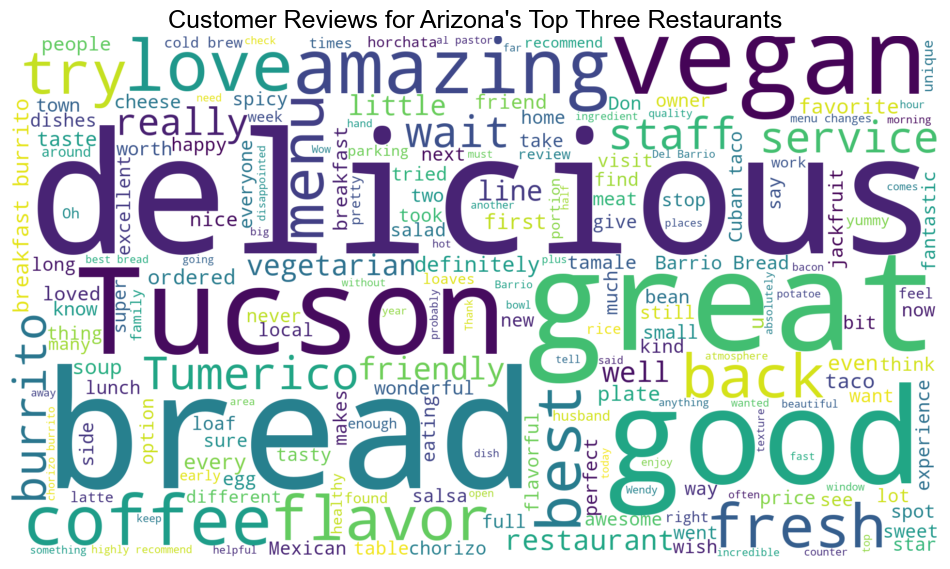

In [87]:
## Review Word Cloud - Arizona
review_text_az = " ".join(review for review in subset_review_az_top["text"])
review_text_az_word_cloud = WordCloud(stopwords = stopwords, background_color = "white",  width = 1920, height = 1080, random_state = 1).generate(review_text_az)
plt.imshow(review_text_az_word_cloud, interpolation = "bilinear")
plt.title("Customer Reviews for Arizona's Top Three Restaurants", fontsize = 18, color = "black")
plt.axis("off")
plt.show()

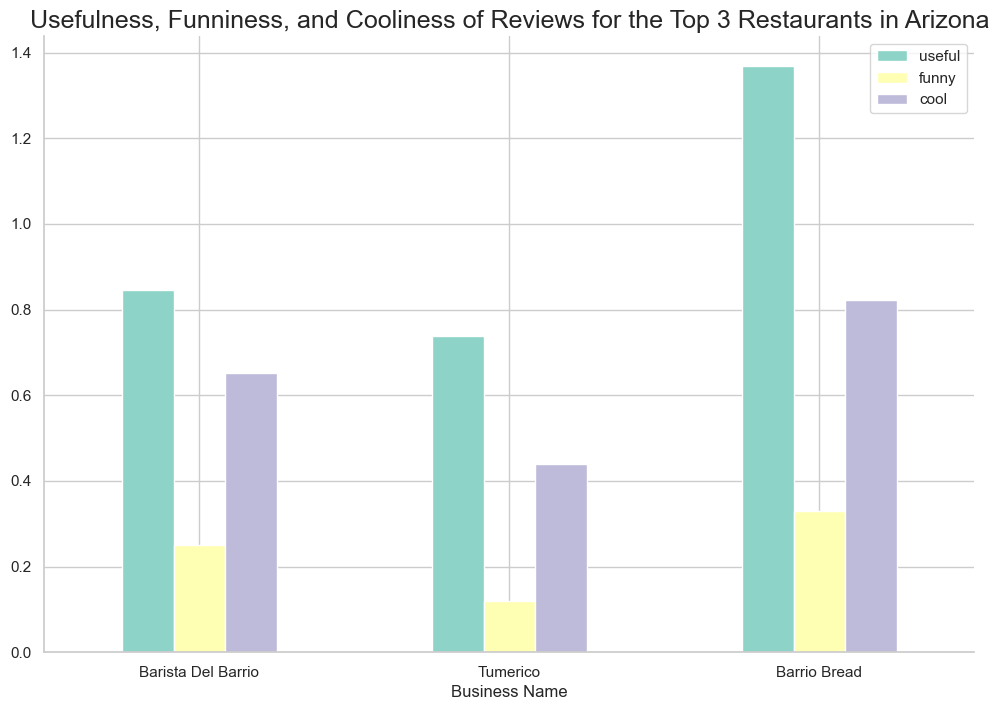

In [88]:
## Review Sentiments - Arizona
plot_subset_review_az_top = subset_review_az_top.groupby(subset_review_az_top.business_id)[["useful", "funny", "cool"]].mean().plot(kind = "bar")
plt.title("Usefulness, Funniness, and Cooliness of Reviews for the Top 3 Restaurants in Arizona", fontsize = 18)
plt.xticks([0, 1, 2], ["Barista Del Barrio", "Tumerico", "Barrio Bread"], rotation = 360)
plot_subset_review_az_top.set_xlabel("Business Name")
plt.show()

### Florida

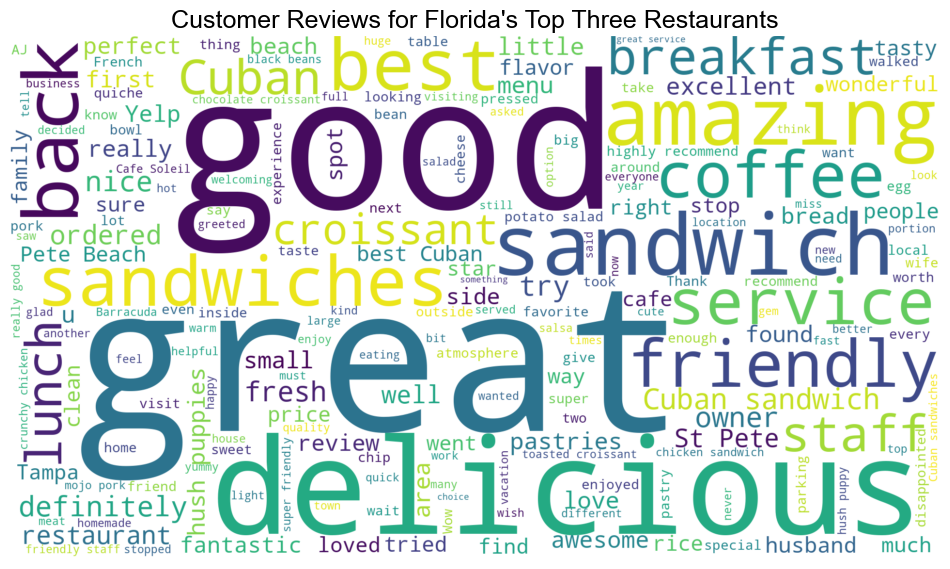

In [89]:
## Review Word Cloud - Florida
review_text_fl = " ".join(review for review in subset_review_fl_top["text"])
review_text_fl_word_cloud = WordCloud(stopwords = stopwords, background_color = "white",  width = 1920, height = 1080, random_state = 1).generate(review_text_fl)
plt.imshow(review_text_fl_word_cloud, interpolation = "bilinear")
plt.title("Customer Reviews for Florida's Top Three Restaurants", fontsize = 18, color = "black")
plt.axis("off")
plt.show()

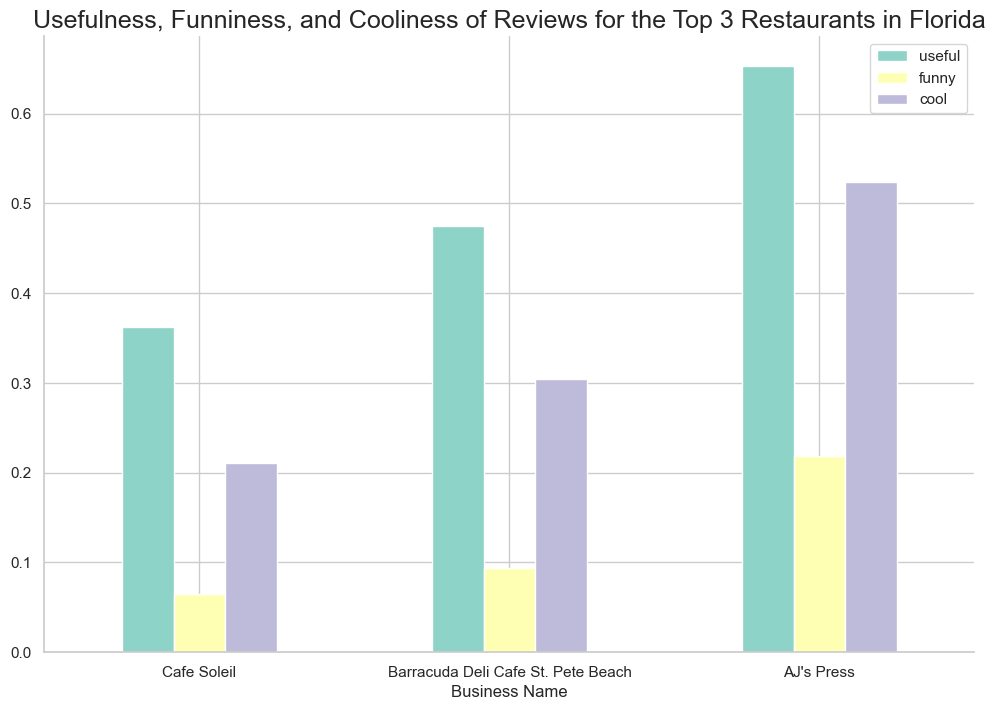

In [91]:
## Review Sentiments - Florida
plot_subset_review_fl_top = subset_review_fl_top.groupby(subset_review_fl_top.business_id)[["useful", "funny", "cool"]].mean().plot(kind = "bar")
plt.title("Usefulness, Funniness, and Cooliness of Reviews for the Top 3 Restaurants in Florida", fontsize = 18)
plt.xticks([0, 1, 2], ["Cafe Soleil", "Barracuda Deli Cafe St. Pete Beach", "AJ's Press"], rotation = 360)
plot_subset_review_fl_top.set_xlabel("Business Name")
plt.show()

### Idaho

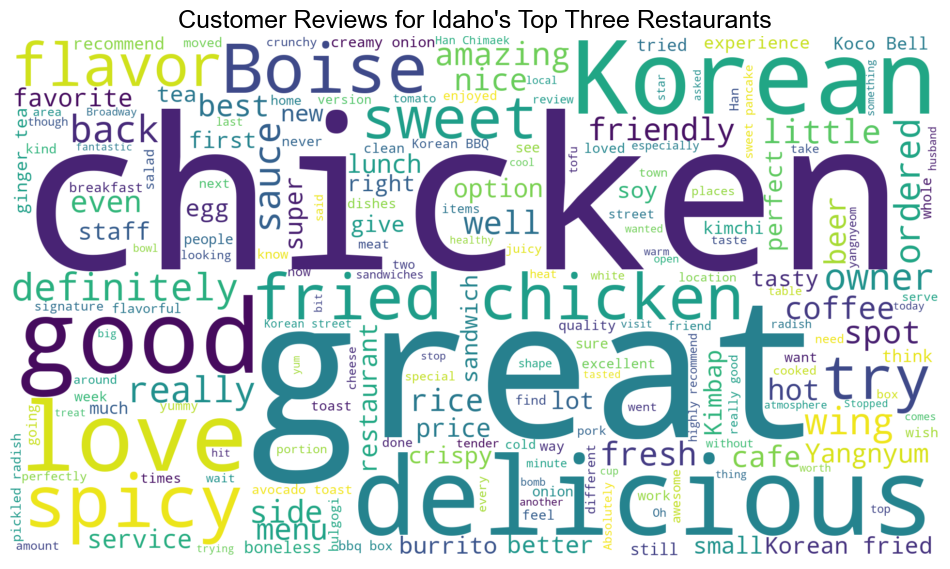

In [92]:
## Review Word Cloud - Idaho
review_text_id = " ".join(review for review in subset_review_id_top["text"])
review_text_id_word_cloud = WordCloud(stopwords = stopwords, background_color = "white",  width = 1920, height = 1080, random_state = 1).generate(review_text_id)
plt.imshow(review_text_id_word_cloud, interpolation = "bilinear")
plt.title("Customer Reviews for Idaho's Top Three Restaurants", fontsize = 18, color = "black")
plt.axis("off")
plt.show()

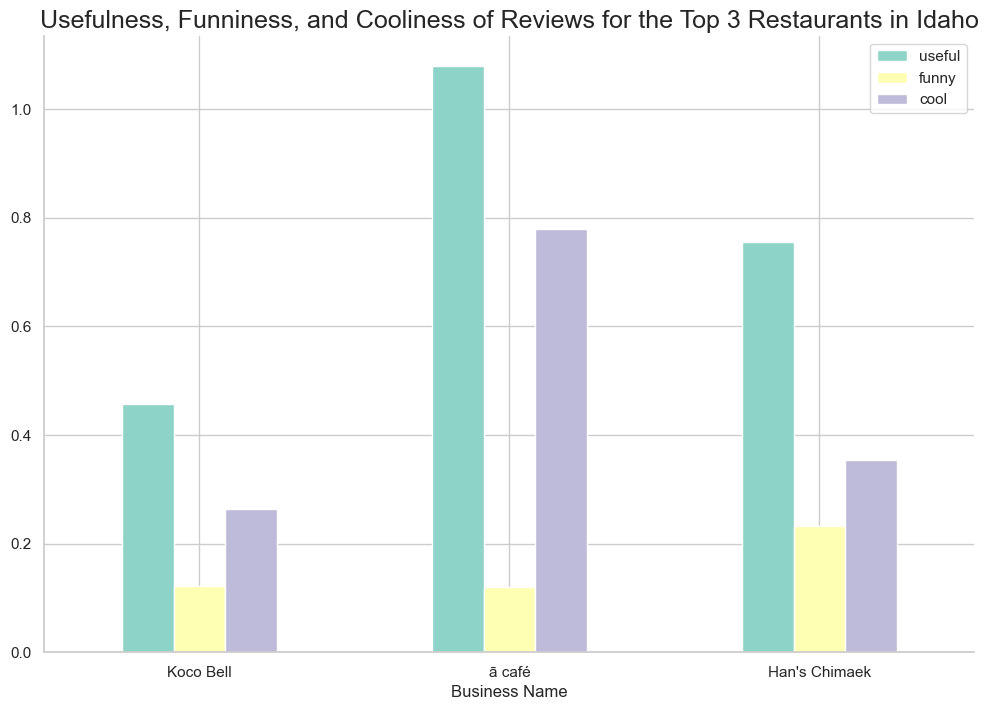

In [93]:
## Review Sentiments - Idaho
plot_subset_review_id_top = subset_review_id_top.groupby(subset_review_id_top.business_id)[["useful", "funny", "cool"]].mean().plot(kind = "bar")
plt.title("Usefulness, Funniness, and Cooliness of Reviews for the Top 3 Restaurants in Idaho", fontsize = 18)
plt.xticks([0, 1, 2], ["Koco Bell", "ā café", "Han's Chimaek"], rotation = 360)
plot_subset_review_id_top.set_xlabel("Business Name")
plt.show()

### Indiana

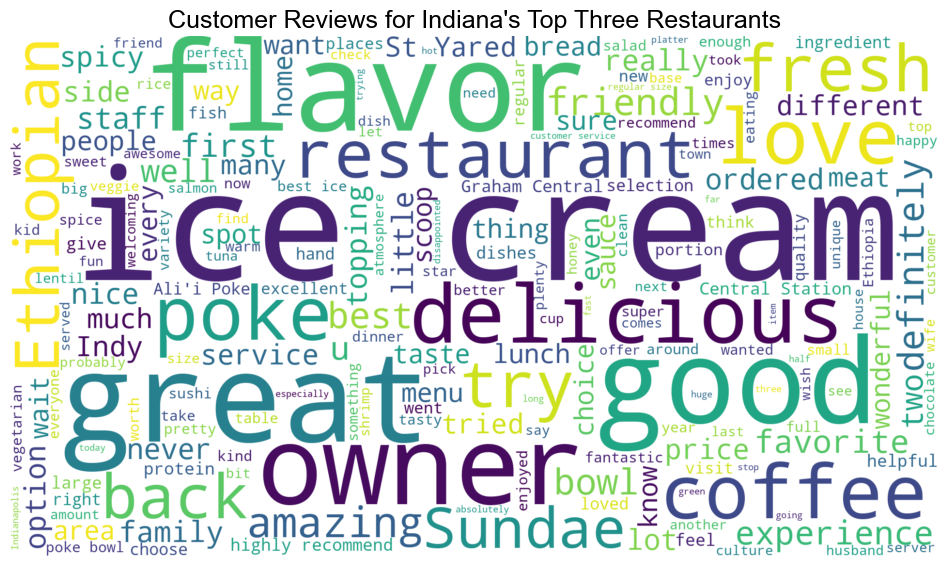

In [94]:
## Review Word Cloud - Indiana
review_text_in = " ".join(review for review in subset_review_in_top["text"])
review_text_in_word_cloud = WordCloud(stopwords = stopwords, background_color = "white",  width = 1920, height = 1080, random_state = 1).generate(review_text_in)
plt.imshow(review_text_in_word_cloud, interpolation = "bilinear")
plt.title("Customer Reviews for Indiana's Top Three Restaurants", fontsize = 18, color = "black")
plt.axis("off")
plt.show()

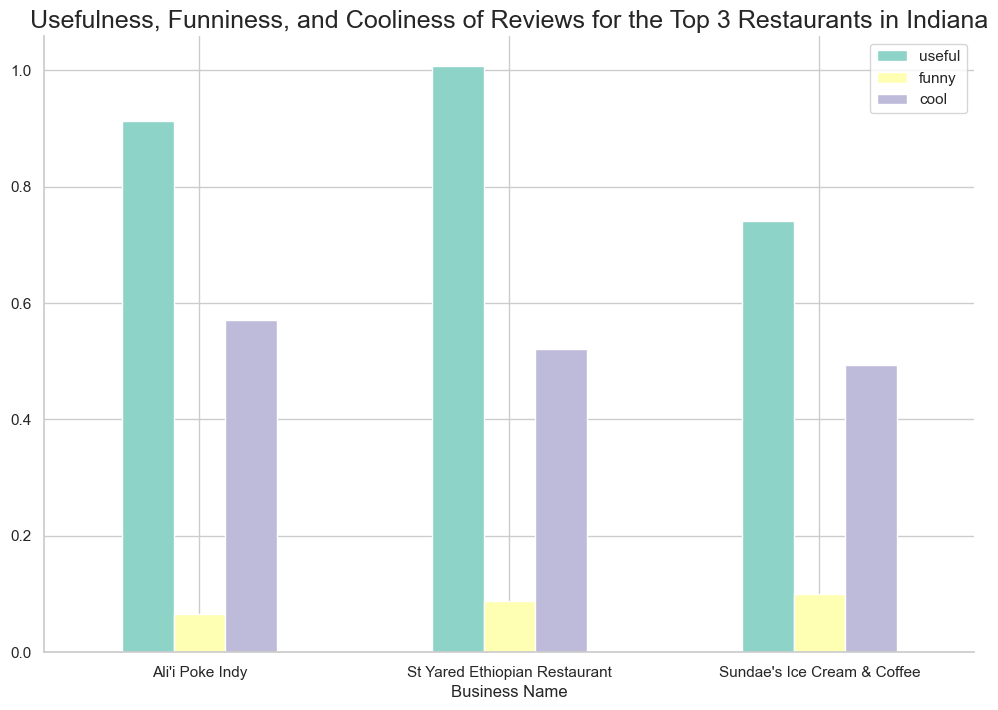

In [95]:
## Review Sentiments - Indiana
plot_subset_review_in_top = subset_review_in_top.groupby(subset_review_in_top.business_id)[["useful", "funny", "cool"]].mean().plot(kind = "bar")
plt.title("Usefulness, Funniness, and Cooliness of Reviews for the Top 3 Restaurants in Indiana", fontsize = 18)
plt.xticks([0, 1, 2], ["Ali'i Poke Indy", "St Yared Ethiopian Restaurant", "Sundae's Ice Cream & Coffee"], rotation = 360)
plot_subset_review_in_top.set_xlabel("Business Name")
plt.show()

### Louisiana

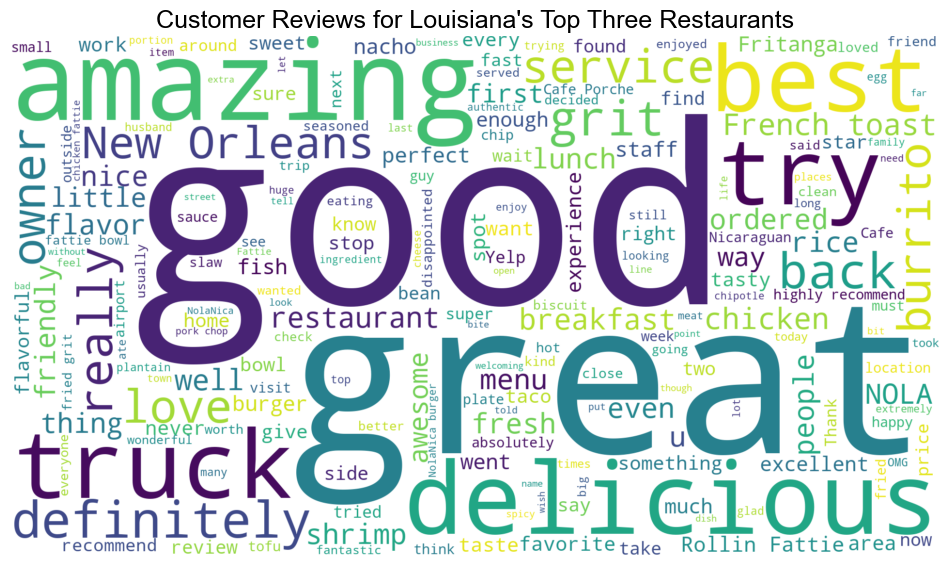

In [96]:
## Review Word Cloud - Louisiana
review_text_la = " ".join(review for review in subset_review_la_top["text"])
review_text_la_word_cloud = WordCloud(stopwords = stopwords, background_color = "white",  width = 1920, height = 1080, random_state = 1).generate(review_text_la)
plt.imshow(review_text_la_word_cloud, interpolation = "bilinear")
plt.title("Customer Reviews for Louisiana's Top Three Restaurants", fontsize = 18, color = "black")
plt.axis("off")
plt.show()

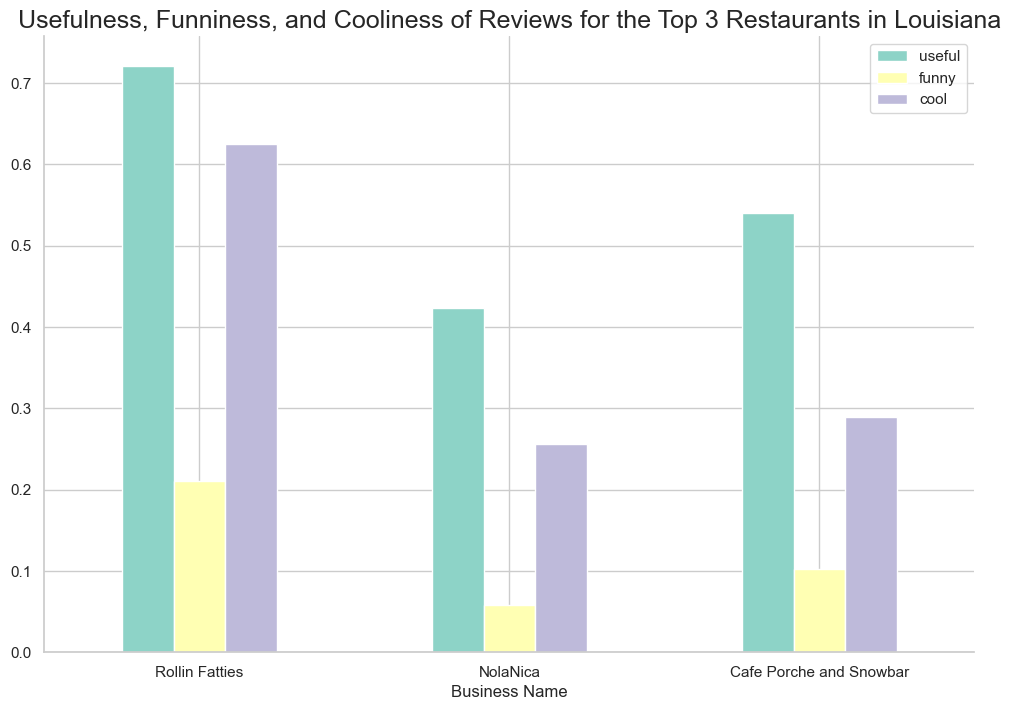

In [98]:
## Review Sentiments - Louisiana
plot_subset_review_la_top = subset_review_az_top.groupby(subset_review_la_top.business_id)[["useful", "funny", "cool"]].mean().plot(kind = "bar")
plt.title("Usefulness, Funniness, and Cooliness of Reviews for the Top 3 Restaurants in Louisiana", fontsize = 18)
plt.xticks([0, 1, 2], ["Rollin Fatties", "NolaNica", "Cafe Porche and Snowbar"], rotation = 360)
plot_subset_review_la_top.set_xlabel("Business Name")
plt.show()

### Missouri

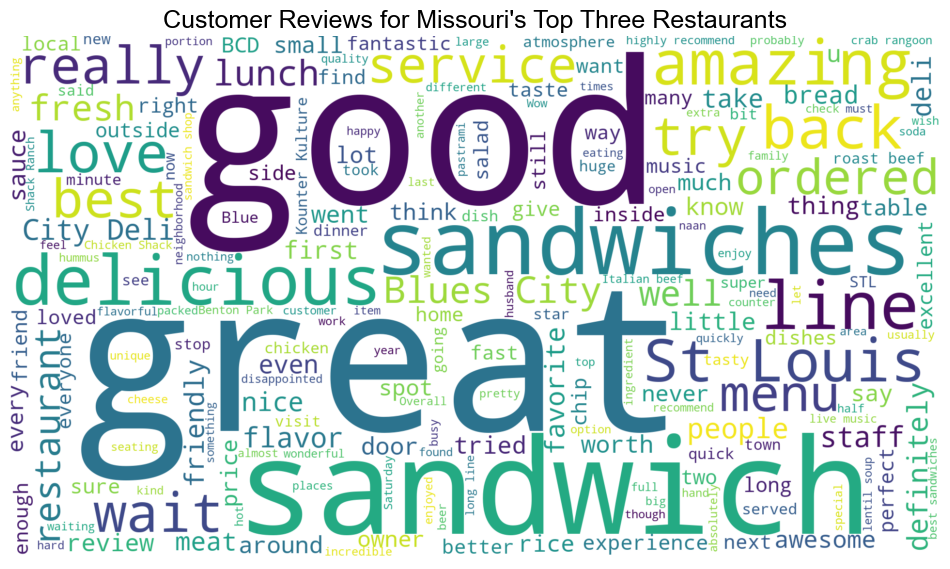

In [99]:
## Review Word Cloud - Missouri
review_text_mo = " ".join(review for review in subset_review_mo_top["text"])
review_text_mo_word_cloud = WordCloud(stopwords = stopwords, background_color = "white",  width = 1920, height = 1080, random_state = 1).generate(review_text_mo)
plt.imshow(review_text_mo_word_cloud, interpolation = "bilinear")
plt.title("Customer Reviews for Missouri's Top Three Restaurants", fontsize = 18, color = "black")
plt.axis("off")
plt.show()

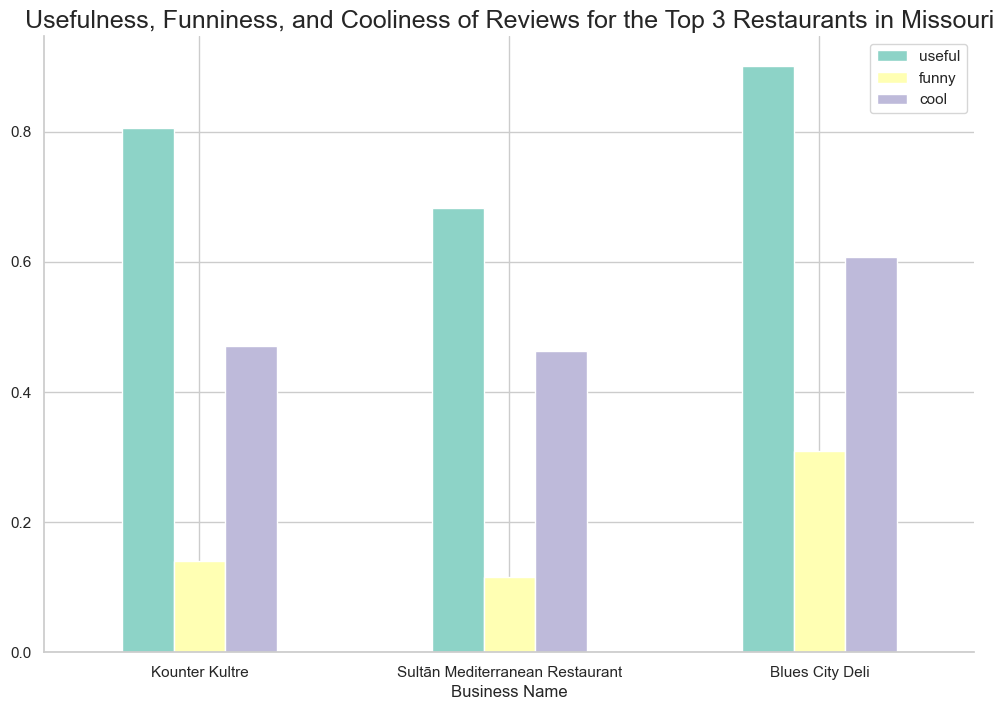

In [101]:
## Review Sentiments - Missouri
plot_subset_review_mo_top = subset_review_mo_top.groupby(subset_review_mo_top.business_id)[["useful", "funny", "cool"]].mean().plot(kind = "bar")
plt.title("Usefulness, Funniness, and Cooliness of Reviews for the Top 3 Restaurants in Missouri", fontsize = 18)
plt.xticks([0, 1, 2], ["Kounter Kultre", "Sultān Mediterranean Restaurant", "Blues City Deli"], rotation = 360)
plot_subset_review_mo_top.set_xlabel("Business Name")
plt.show()

### New Jersey

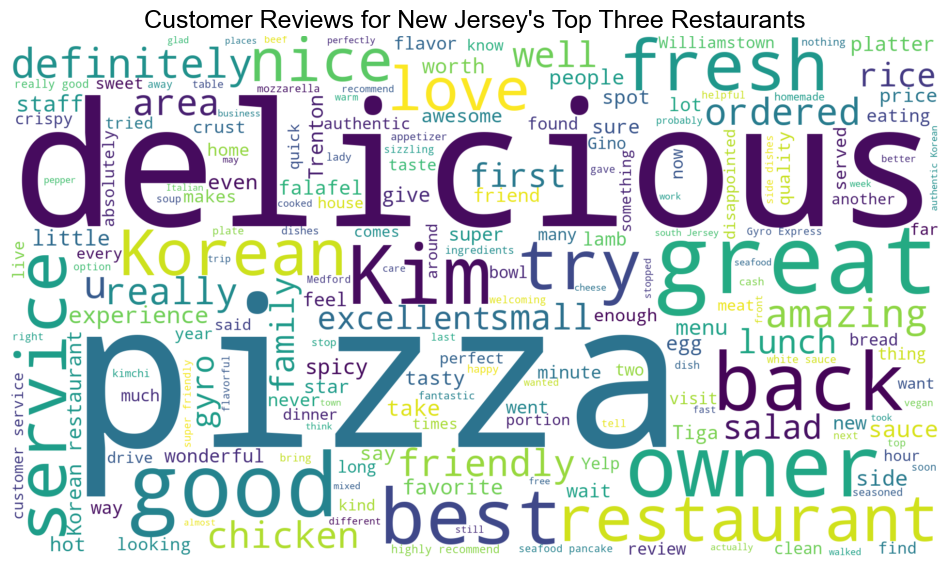

In [102]:
## Review Word Cloud - New Jersey
review_text_nj = " ".join(review for review in subset_review_nj_top["text"])
review_text_nj_word_cloud = WordCloud(stopwords = stopwords, background_color = "white",  width = 1920, height = 1080, random_state = 1).generate(review_text_nj)
plt.imshow(review_text_nj_word_cloud, interpolation = "bilinear")
plt.title("Customer Reviews for New Jersey's Top Three Restaurants", fontsize = 18, color = "black")
plt.axis("off")
plt.show()

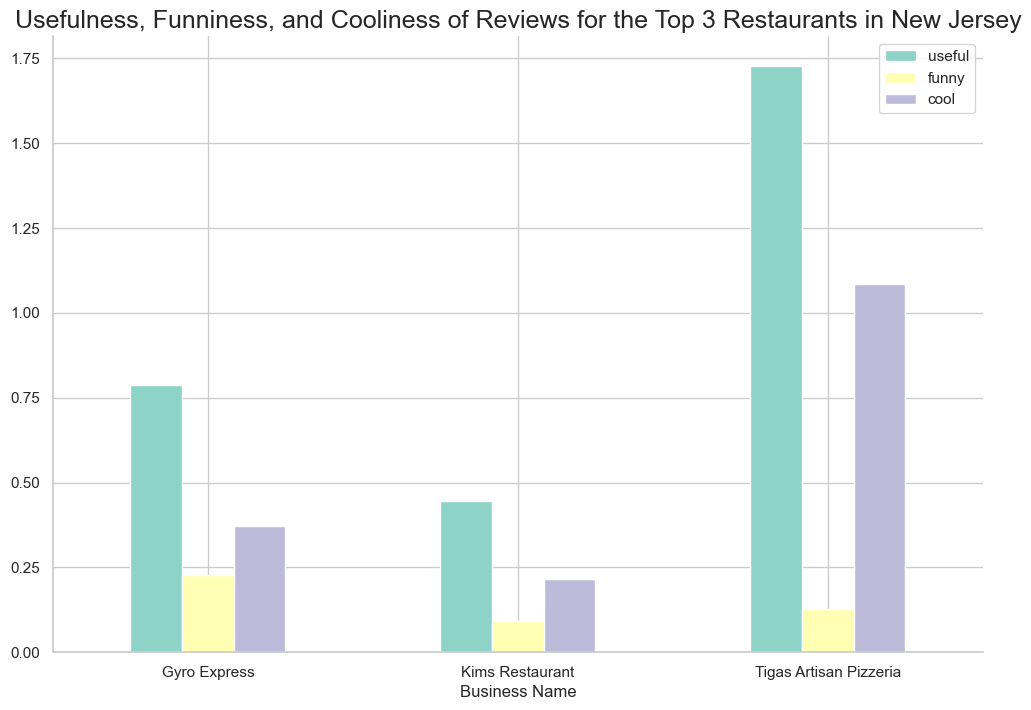

In [104]:
## Review Sentiments - New Jersey
plot_subset_review_nj_top = subset_review_nj_top.groupby(subset_review_nj_top.business_id)[["useful", "funny", "cool"]].mean().plot(kind = "bar")
plt.title("Usefulness, Funniness, and Cooliness of Reviews for the Top 3 Restaurants in New Jersey", fontsize = 18)
plt.xticks([0, 1, 2], ["Gyro Express", "Kims Restaurant", "Tigas Artisan Pizzeria"], rotation = 360)
plot_subset_review_nj_top.set_xlabel("Business Name")
plt.show()

### Nevada

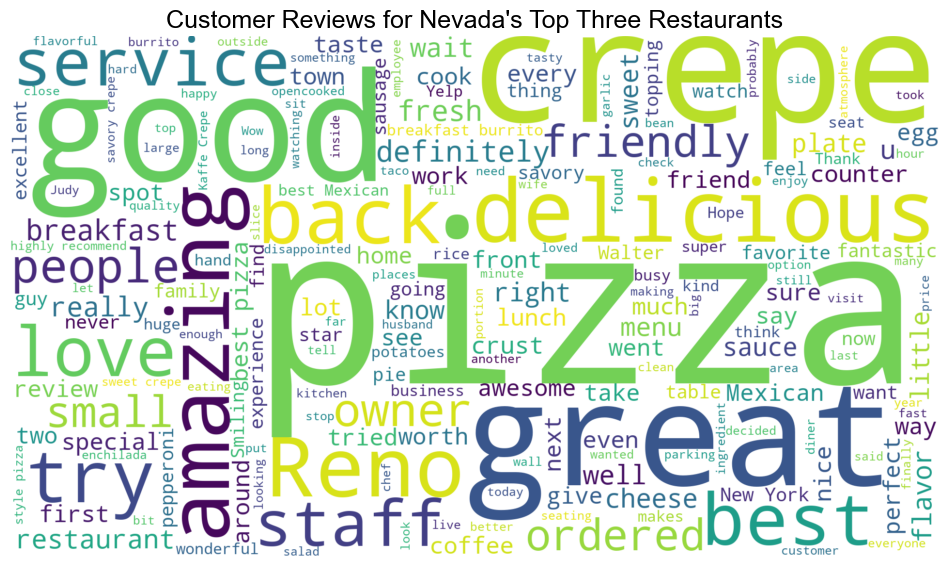

In [105]:
## Review Word Cloud - Nevada
review_text_nv = " ".join(review for review in subset_review_nv_top["text"])
review_text_nv_word_cloud = WordCloud(stopwords = stopwords, background_color = "white",  width = 1920, height = 1080, random_state = 1).generate(review_text_nv)
plt.imshow(review_text_nv_word_cloud, interpolation = "bilinear")
plt.title("Customer Reviews for Nevada's Top Three Restaurants", fontsize = 18, color = "black")
plt.axis("off")
plt.show()

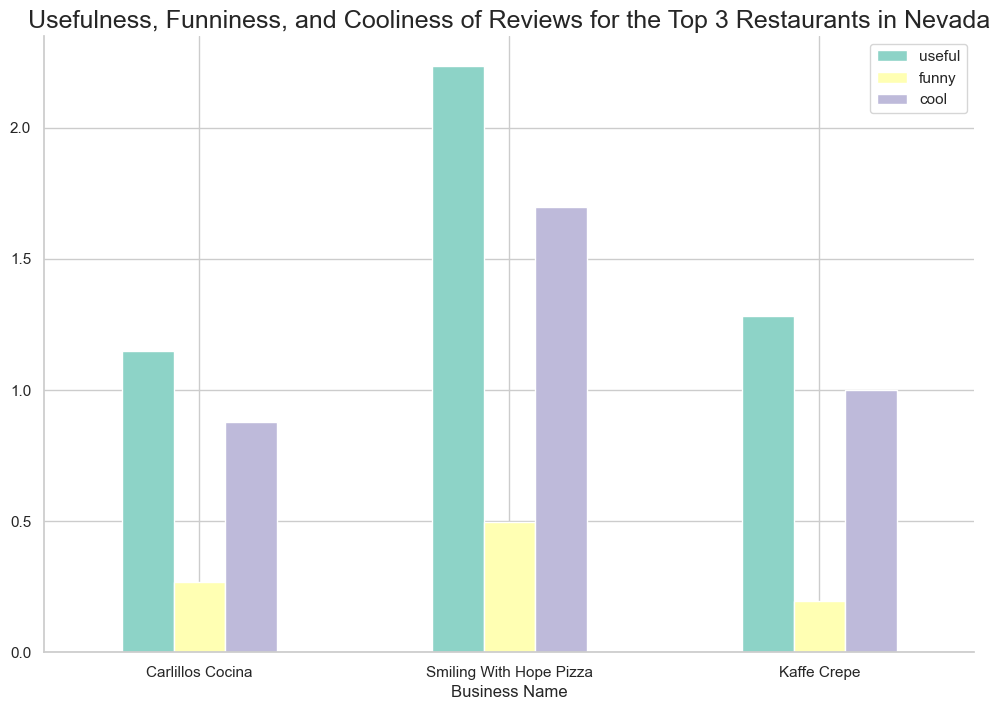

In [109]:
## Review Sentiments - Nevada
plot_subset_review_nv_top = subset_review_nv_top.groupby(subset_review_nv_top.business_id)[["useful", "funny", "cool"]].mean().plot(kind = "bar")
plt.title("Usefulness, Funniness, and Cooliness of Reviews for the Top 3 Restaurants in Nevada", fontsize = 18)
plt.xticks([0, 1, 2], ["Carlillos Cocina", "Smiling With Hope Pizza", "Kaffe Crepe"], rotation = 360)
plot_subset_review_nv_top.set_xlabel("Business Name")
plt.show()

### Pennsylvania

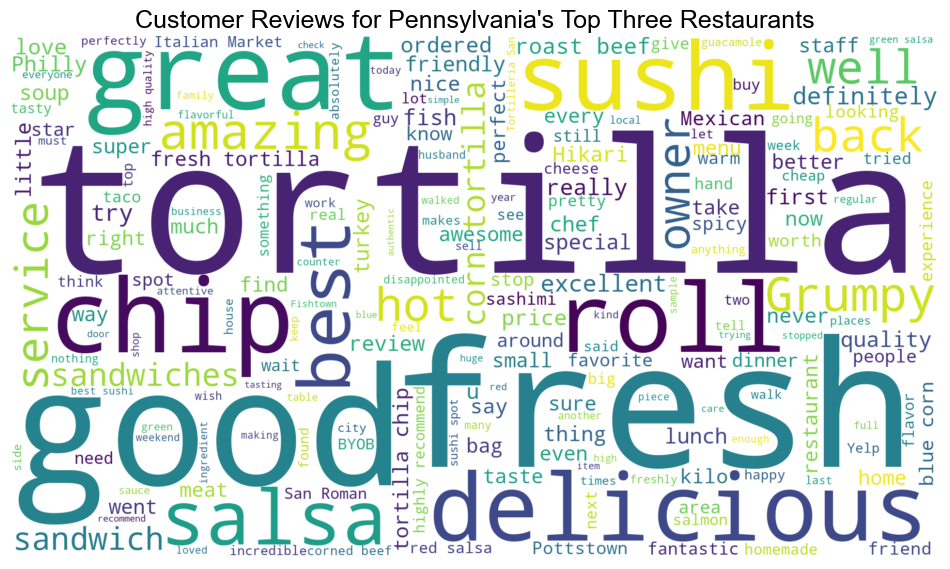

In [108]:
## Review Word Cloud - Pennsylvania
review_text_pa = " ".join(review for review in subset_review_pa_top["text"])
review_text_pa_word_cloud = WordCloud(stopwords = stopwords, background_color = "white",  width = 1920, height = 1080, random_state = 1).generate(review_text_pa)
plt.imshow(review_text_pa_word_cloud, interpolation = "bilinear")
plt.title("Customer Reviews for Pennsylvania's Top Three Restaurants", fontsize = 18, color = "black")
plt.axis("off")
plt.show()

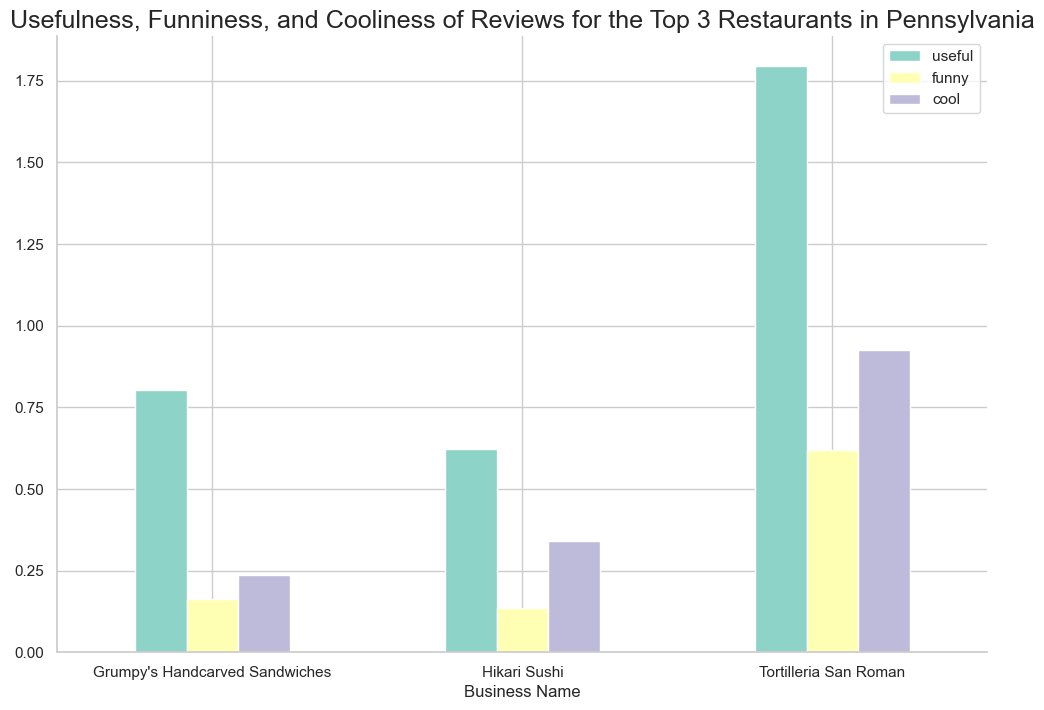

In [111]:
## Review Sentiments - Pennsylvania
plot_subset_review_pa_top = subset_review_pa_top.groupby(subset_review_pa_top.business_id)[["useful", "funny", "cool"]].mean().plot(kind = "bar")
plt.title("Usefulness, Funniness, and Cooliness of Reviews for the Top 3 Restaurants in Pennsylvania", fontsize = 18)
plt.xticks([0, 1, 2], ["Grumpy's Handcarved Sandwiches", "Hikari Sushi", "Tortilleria San Roman"], rotation = 360)
plot_subset_review_pa_top.set_xlabel("Business Name")
plt.show()

### Tennessee

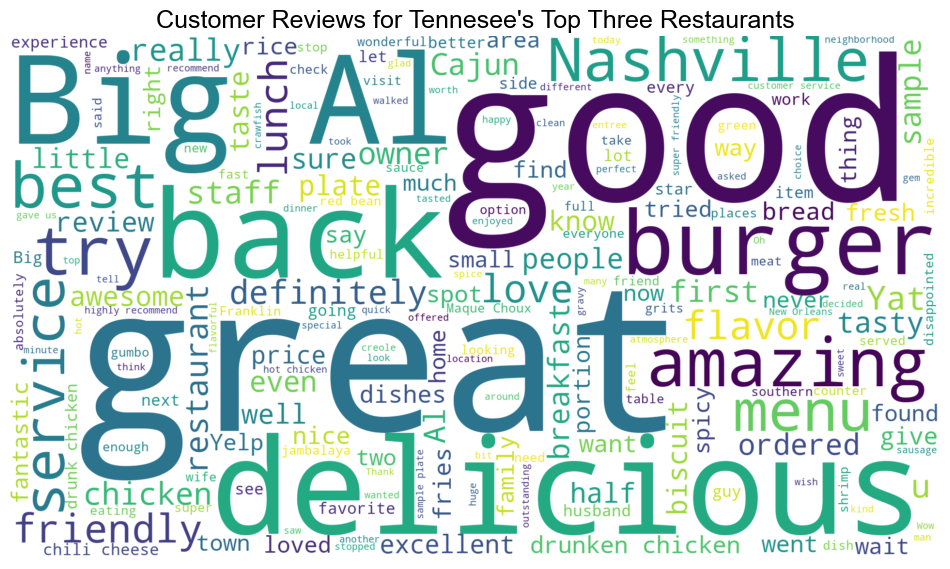

In [112]:
## Review Word Cloud - Tennessee
review_text_tn = " ".join(review for review in subset_review_tn_top["text"])
review_text_tn_word_cloud = WordCloud(stopwords = stopwords, background_color = "white",  width = 1920, height = 1080, random_state = 1).generate(review_text_tn)
plt.imshow(review_text_tn_word_cloud, interpolation = "bilinear")
plt.title("Customer Reviews for Tennesee's Top Three Restaurants", fontsize = 18, color = "black")
plt.axis("off")
plt.show()

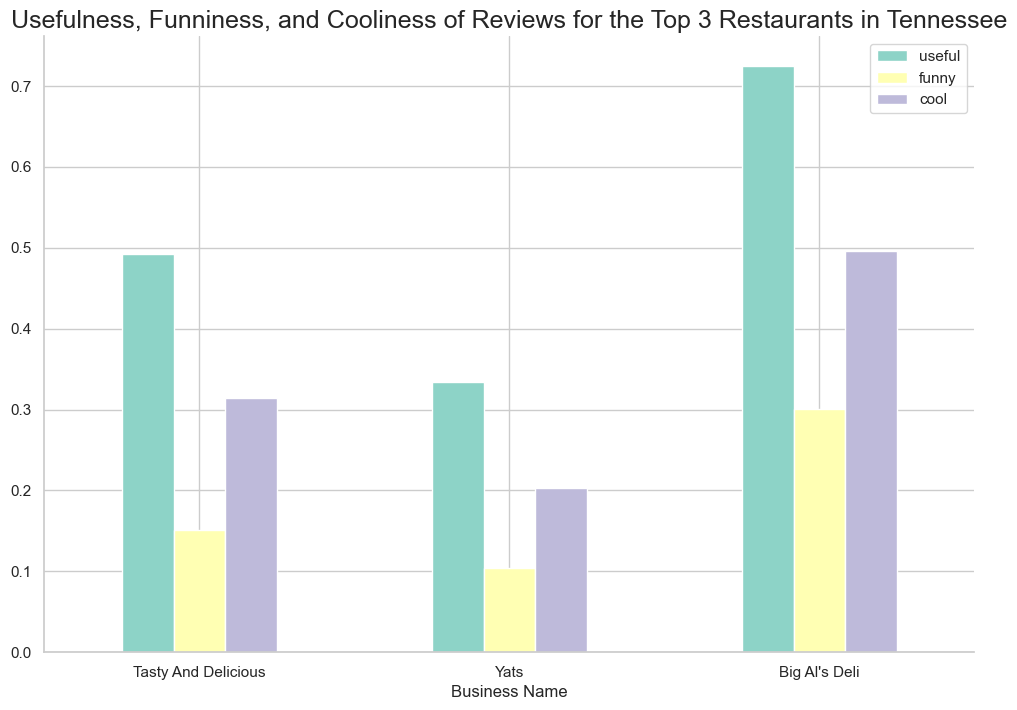

In [115]:
## Review Sentiments - Tennessee
plot_subset_review_tn_top = subset_review_tn_top.groupby(subset_review_tn_top.business_id)[["useful", "funny", "cool"]].mean().plot(kind = "bar")
plt.title("Usefulness, Funniness, and Cooliness of Reviews for the Top 3 Restaurants in Tennessee", fontsize = 18)
plt.xticks([0, 1, 2], ["Tasty And Delicious", "Yats", "Big Al's Deli"], rotation = 360)
plot_subset_review_tn_top.set_xlabel("Business Name")
plt.show()

# 7. Conclusions
## A. About The Dataset
- The distribution of stars across the states was more similar than initially assumed
- Some states had interesting distance difference between the top 3 restaurants (FL, IN, NJ, PA, TN)
- Good, great, and delicious were some of the most common words in reviews across the states analyzed
- It was interesting to see how often the town where the restaurant was located was mentioned in reviews

## B. About The Project
- When working with large datasets, it is important to work on small subsets at a time to reduce confusion and speed up operations
- There are a wealth of visualization libraries that can enable one to create more dynamic and interesting data visualizations
- Using visualizations in EDA can assist in more easily and quickly identifying patterns and outliers in data